In [1]:
%reset -f

In [46]:
# Import
from sklearn.feature_selection import SelectPercentile, f_classif, f_regression
import numpy as np
import matplotlib.pyplot as plt
import datetime as DT
import pandas as pd
import math
import scipy as sp
import datetime
from IPython.core.debugger import Tracer
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics.classification import log_loss

from sklearn import datasets, linear_model
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from sklearn.svm import SVC, SVR
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder,RobustScaler
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
#from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest

%matplotlib inline
import seaborn as sns; sns.set()
import operator
import itertools
import matplotlib.patches as mpatches
from scipy.stats.stats import pearsonr
import scipy

import utils as ut
import warnings
warnings.filterwarnings('ignore')
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

In [4]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

## Load in new data set and get an idea of dimensions
## 1) load data

In [5]:
#f1 = "C:/Users/lloyd/data/LFB incident data 1 Jan 2009 to 31 Aug 2015/LFB incident data 1 Jan 2009 to 31 Dec 2011.csv"
#f2 = "/Users/david/data/historical_balance.csv"
f1 = "/Users/david/data/dataset_challenge_one (6) (1) (1).tsv"
#df = pd.DataFrame.from_csv(f1, sep='\t', header=0)
df = pd.read_csv(f1, sep='\t', header=0)
#df = pd.read_csv(f1, header=0, nrows = 150, infer_datetime_format=True)
#df = df.convert_objects(convert_numeric=True)
#coltodatetime(df, "post_date")
#coltodatetime(df, "value_date")
#splitcol(df, "Postcode_full", ' ')
#combinedatentime(df, "DateOfCall", "TimeOfCall", "DatetimeOfCall")
#df['hour'] = df["DatetimeOfCall"].apply(lambda x : x.hour)
#df['month'] = df["DatetimeOfCall"].apply(lambda x : x.month)
#df['weekday'] = df["DatetimeOfCall"].apply(lambda x : x.weekday())
print("Dataframe shape")
print(df.shape)
print("Columns")
print(df.dtypes)
print("Samples")
ut.dispdf(df,20)

Dataframe shape
(272, 1554)
Columns
Variable_1       float64
Variable_2       float64
Variable_3       float64
Variable_4       float64
Variable_5       float64
Variable_6       float64
Variable_7       float64
Variable_8       float64
Variable_9       float64
Variable_10      float64
Variable_11      float64
Variable_12      float64
Variable_13      float64
Variable_14      float64
Variable_15      float64
Variable_16      float64
Variable_17      float64
Variable_18      float64
Variable_19      float64
Variable_20      float64
Variable_21      float64
Variable_22      float64
Variable_23      float64
Variable_24      float64
Variable_25      float64
Variable_26      float64
Variable_27      float64
Variable_28      float64
Variable_29      float64
Variable_30      float64
                  ...   
Variable_1525    float64
Variable_1526    float64
Variable_1527    float64
Variable_1528    float64
Variable_1529    float64
Variable_1530    float64
Variable_1531    float64
Variable_1532 

,Variable_1,Variable_2,Variable_3,Variable_4,Variable_5,Variable_6,Variable_7,Variable_8,Variable_9,Variable_10,Variable_11,Variable_12,Variable_13,Variable_14,Variable_15,Variable_16,Variable_17,Variable_18,Variable_19,Variable_20
0,-0.954246,0.051024,-0.111203,-0.050066,-0.340897,-0.038770,-0.104256,-0.485671,-0.565482,0.159871,0.198546,0.131750,0.600214,0.034498,0.492915,0.032284,0.020498,0.162939,-0.026182,0.090109
1,0.244626,-0.199602,-0.111397,-0.135207,0.026813,-0.165675,0.081549,-0.736914,0.118127,-0.183824,0.265609,-0.080799,-0.034788,0.146600,0.096864,0.043611,0.049600,0.150307,-0.150096,-0.082436
2,0.082434,-0.156199,-0.084980,-0.179003,-0.490377,-0.193691,0.186532,-0.801328,0.128750,0.403489,0.161287,0.030411,-0.074798,-0.190267,0.111516,-0.212994,-0.083166,0.363167,-0.202888,0.037665
3,-1.071614,-0.206041,-0.051775,-0.049676,-0.306176,0.061596,0.115982,-0.842997,-0.020820,-0.189779,-0.003238,0.450045,-0.024921,-0.187729,0.012188,-0.110403,-0.036232,-0.014174,-0.192298,-0.116583
4,-0.982276,-0.514666,-0.118483,-0.086523,-0.377659,-0.093353,0.302795,-0.794573,-0.001558,-0.210314,0.046650,-0.151043,-0.016541,-0.168022,0.048334,-0.049165,-0.060926,-0.060485,-0.061257,-0.018171


,Variable_21,Variable_22,Variable_23,Variable_24,Variable_25,Variable_26,Variable_27,Variable_28,Variable_29,Variable_30,Variable_31,Variable_32,Variable_33,Variable_34,Variable_35,Variable_36,Variable_37,Variable_38,Variable_39,Variable_40
0,-0.110716,0.025322,0.690928,0.764825,0.579042,0.039256,-0.112008,-0.014334,0.012805,0.746400,-0.020099,-0.070284,-0.410170,0.139930,0.313297,0.645509,-0.122269,-0.082007,0.351892,0.208250
1,-0.117535,-0.245531,-0.070265,0.046395,0.055705,0.088564,-0.090754,-0.200864,-0.071210,-0.418519,-0.105610,-0.072491,0.086513,-0.014931,-0.060254,0.005230,-0.151410,-0.282336,0.023717,0.139540
2,-0.061916,0.082368,0.048723,-0.030065,0.166866,-0.145519,-0.039055,0.108837,0.037011,-0.117579,-0.096034,-0.056609,-0.076556,0.258624,0.101771,0.137174,-0.160126,0.024189,0.082768,0.252660
3,-0.117127,-0.082694,-0.005107,-0.074346,0.090662,0.214941,-0.114225,-0.112160,-0.108567,-0.192184,-0.090999,-0.093462,-0.587146,0.095157,0.029532,0.038152,-0.055742,-0.056952,-0.234063,-0.045315
4,-0.057568,0.033263,0.070836,-0.028673,0.103178,0.081241,-0.029509,-0.065523,-0.073158,-0.294788,-0.056577,-0.063829,0.126302,0.051351,0.016544,-0.051147,-0.150516,-0.166902,-0.129874,-0.212843


,Variable_41,Variable_42,Variable_43,Variable_44,Variable_45,Variable_46,Variable_47,Variable_48,Variable_49,Variable_50,Variable_51,Variable_52,Variable_53,Variable_54,Variable_55,Variable_56,Variable_57,Variable_58,Variable_59,Variable_60
0,0.064086,-0.436356,-0.061120,-0.218654,-0.063444,-0.458989,-0.042714,0.107555,-0.046282,-0.607396,-0.298014,-0.020523,-0.380730,-0.731905,-0.208567,-0.009658,0.264321,-0.468796,-0.043941,-0.469030
1,-0.109258,-0.242563,-0.046313,-0.077276,-0.101312,-0.463026,-0.080892,-0.151257,-0.095722,-0.277591,-0.534005,-0.006091,-0.426614,-0.610194,0.214168,-0.102804,0.231918,-0.378103,-0.496814,-0.673271
2,0.038133,-0.502416,-0.085013,-0.070318,-0.103448,-0.514130,-0.082062,-0.128593,-0.103577,-0.051940,-0.467242,-0.017634,0.320098,-0.560666,-0.210269,-0.157067,-0.131485,-0.362086,-0.317032,-0.129610
3,0.014587,-0.312572,-0.106923,-0.589406,-0.041847,-0.521765,-0.091159,0.174891,-0.110732,0.081555,-0.388621,-0.067356,0.638883,-0.752105,-0.238773,-0.046779,0.296058,-0.495123,-0.060168,0.147430
4,-0.187535,-0.425278,-0.052321,-0.127992,-0.053063,-0.142176,-0.107002,0.059931,-0.120258,-0.044911,-0.002394,-0.052131,-0.443651,-0.372811,-0.357767,-0.081700,0.199455,0.001213,-0.301941,-0.324412


,Variable_61,Variable_62,Variable_63,Variable_64,Variable_65,Variable_66,Variable_67,Variable_68,Variable_69,Variable_70,Variable_71,Variable_72,Variable_73,Variable_74,Variable_75,Variable_76,Variable_77,Variable_78,Variable_79,Variable_80
0,0.215989,-0.386191,-0.412871,0.059138,-0.188744,-0.338177,0.293378,-0.206389,-0.662552,-0.393674,-0.379861,-0.052162,-0.602635,-0.009926,0.084592,0.034111,-0.168077,0.386483,0.564885,0.567547
1,-0.181023,0.461000,1.033179,-0.064528,0.105519,-0.379051,-0.202288,0.044582,0.212550,0.258632,0.248212,-0.288658,-0.330377,-0.205875,-0.374288,-0.670042,-0.258033,-0.208707,-0.068018,-0.028902
2,-0.099817,0.976473,-0.226415,-0.089304,-0.348236,-0.171433,-0.280356,0.293563,-0.029061,0.228214,0.220236,-0.105929,0.403210,-0.370791,-0.019662,-0.207856,-0.282276,-0.227644,0.157068,0.181181
3,-0.135722,-0.560134,-0.313288,-0.058693,-0.056777,0.423212,-0.282164,0.179245,-0.740274,-0.879258,-0.858772,-0.064678,0.267690,-0.269906,0.022762,0.019408,-0.150287,-0.666152,0.178200,0.118723
4,0.195129,-0.448369,-0.850559,-0.037206,0.087418,-0.273102,-0.330834,-0.046541,0.306676,0.548042,0.536014,-0.122503,-0.292595,0.171441,-0.005125,-0.275666,-0.170958,-0.465670,0.113098,0.105287


,Variable_81,Variable_82,Variable_83,Variable_84,Variable_85,Variable_86,Variable_87,Variable_88,Variable_89,Variable_90,Variable_91,Variable_92,Variable_93,Variable_94,Variable_95,Variable_96,Variable_97,Variable_98,Variable_99,Variable_100
0,-0.082433,-0.326897,0.040499,-0.459177,0.000084,-0.009372,-0.429403,-0.009102,-0.249661,-0.028993,-0.361512,-0.407895,-1.222812,-0.015455,-0.423545,0.112265,-0.047353,0.082021,-0.602528,-0.190188
1,-0.165576,-0.379202,-0.129369,-0.005966,-0.245255,0.002931,0.016828,-0.302577,-0.209844,0.035349,-0.355645,-0.281978,-1.275695,-0.177539,-0.651556,0.006612,-0.051120,-0.064985,-0.655932,-0.040762
2,-0.261680,-0.446216,-0.039467,-0.167400,-0.164722,0.107712,0.066196,-0.033533,-0.271823,0.009178,-0.353276,-0.501859,-1.200770,-0.011850,-0.512380,0.045149,0.024733,-0.030762,-0.651064,-0.118007
3,0.023592,-0.522390,-0.060704,-0.365705,-0.080313,-0.178891,-0.049695,0.003398,-0.312674,-0.042298,-0.268126,-0.160847,-0.682960,-0.054801,-0.227748,0.077870,-0.020769,0.109470,-0.656663,-0.135591
4,-0.125615,-0.108290,-0.003358,0.253999,-0.095224,0.383268,-0.101165,-0.063659,0.138641,-0.048362,0.426062,0.068628,0.506258,-0.046129,-0.748286,0.100411,-0.013822,-0.001126,-0.469188,-0.041073


,Variable_101,Variable_102,Variable_103,Variable_104,Variable_105,Variable_106,Variable_107,Variable_108,Variable_109,Variable_110,Variable_111,Variable_112,Variable_113,Variable_114,Variable_115,Variable_116,Variable_117,Variable_118,Variable_119,Variable_120
0,-0.145215,0.004135,-0.176333,-0.110213,-0.033205,0.155177,0.323255,-0.073127,-0.023413,-0.311654,0.009236,-0.044002,0.132608,-0.334047,-0.808405,-0.323191,-0.577493,0.360844,0.111842,-0.697586
1,-0.068455,-0.000506,0.156947,-0.163035,-0.247097,-0.038578,-0.236771,0.126567,-0.186868,-0.319609,-0.117635,-0.086183,0.271211,-0.428458,-0.152242,0.171002,0.127266,0.169131,-0.392690,-0.048966
2,-0.329559,-0.077443,0.254080,-0.096291,-0.047501,0.038349,0.159437,-0.198785,-0.033271,-0.190758,0.438414,-0.007566,0.241783,-0.376468,-0.156469,0.046833,-0.069948,0.555772,-0.493690,-0.487741
3,-0.234001,-0.060119,0.278747,0.009014,0.122116,-0.040892,0.307104,0.210041,-0.080372,-0.310906,-0.134424,-0.048080,-0.389279,-0.295675,-0.645735,0.984978,0.689372,0.974152,-0.399570,-0.674144
4,-0.232803,-0.054378,0.034033,0.075284,-0.068417,-0.009581,0.201022,0.032104,-0.118790,-0.350702,0.020884,-0.052451,-0.265011,-0.296953,-0.341601,-0.479474,0.170933,-1.120656,-0.428445,-0.355829


,Variable_121,Variable_122,Variable_123,Variable_124,Variable_125,Variable_126,Variable_127,Variable_128,Variable_129,Variable_130,Variable_131,Variable_132,Variable_133,Variable_134,Variable_135,Variable_136,Variable_137,Variable_138,Variable_139,Variable_140
0,0.735811,0.051385,-0.033327,-0.459596,-0.286968,-0.360244,-0.249860,-0.415610,-0.509504,0.007801,0.318176,-0.447874,0.175315,0.139464,0.032280,0.017776,-0.159254,0.089921,-0.295980,-0.026401
1,0.050717,-0.368978,-0.198285,-0.458846,0.037076,-0.178611,-0.295480,-0.433616,-0.262439,-0.559306,0.200099,-0.040141,-0.076796,-0.270729,-0.049590,-0.015318,-0.288495,0.431318,-0.271795,-0.059392
2,-0.117087,-0.193735,-0.051622,-0.575978,-0.181458,-0.413930,-0.305024,0.204700,-0.418446,0.133298,0.004691,-0.520430,0.072980,-0.259493,-0.234900,-0.032320,-0.140199,0.275636,-0.125631,0.002688
3,0.195040,-0.147739,-0.054888,-0.395504,-0.017605,-0.297058,-0.296589,-0.573276,-0.551571,0.226803,0.364035,0.470708,0.087861,-0.178204,-0.257769,-0.036250,-0.156012,0.215458,-0.268712,-0.007521
4,0.482903,-0.237078,-0.074897,-0.278177,-0.275157,-0.317024,0.058347,0.760574,-0.384144,-0.186228,0.191772,0.651587,0.044348,0.173622,-0.041527,-0.024255,-0.100853,0.295692,-0.217380,0.006223


,Variable_141,Variable_142,Variable_143,Variable_144,Variable_145,Variable_146,Variable_147,Variable_148,Variable_149,Variable_150,Variable_151,Variable_152,Variable_153,Variable_154,Variable_155,Variable_156,Variable_157,Variable_158,Variable_159,Variable_160
0,-0.726821,-0.046697,-0.550422,-0.022145,-0.193019,-0.519450,-0.402447,0.064943,0.039777,-0.156050,-0.046716,0.228131,-0.363149,0.055404,-0.411615,-0.008090,-0.049442,-0.482440,0.001560,0.174193
1,-0.283486,0.050114,-0.153130,-0.071140,0.346402,-0.506473,-0.082923,-0.103313,-0.102083,-0.257112,0.084883,-0.355767,0.127046,-0.045432,-0.325408,-0.027057,-0.123065,-0.596665,0.059397,0.233570
2,0.109966,-0.083484,-0.525978,-0.122270,-0.213809,-0.476869,0.033087,-0.012343,-0.052023,-0.193446,-0.078753,-0.369944,0.088026,0.008017,-0.274360,-0.056740,0.068142,-0.489175,-0.022804,0.374223
3,-0.544872,-0.466819,-0.128685,-0.124449,0.067411,0.558743,-0.178397,-0.008702,-0.032943,0.013507,-0.697316,0.254120,-0.448597,0.031670,-0.405181,-0.093909,-0.091210,-1.149129,-0.006924,-0.419583
4,-0.109632,-0.360700,-0.267602,-0.031800,0.145548,-0.217144,-0.147598,0.001993,0.028193,-0.004006,0.355544,-0.288941,0.033883,-0.032752,-0.010362,-0.038653,-0.099765,-0.590737,-0.038317,-0.238972


,Variable_161,Variable_162,Variable_163,Variable_164,Variable_165,Variable_166,Variable_167,Variable_168,Variable_169,Variable_170,Variable_171,Variable_172,Variable_173,Variable_174,Variable_175,Variable_176,Variable_177,Variable_178,Variable_179,Variable_180
0,0.107997,-0.047147,0.020358,0.230408,-0.044822,-0.021826,0.039778,-0.023779,-0.099338,0.027804,-0.334311,-0.290268,0.288159,-0.268857,0.038376,0.078023,-0.206487,0.203593,0.022346,-0.158805
1,-0.140932,0.258338,-0.004314,-0.161375,-0.026157,0.153867,0.119799,-0.041097,-0.067168,-0.051156,0.215713,-0.050266,-0.075648,0.692529,-0.135564,-0.062270,-0.326907,0.172134,-0.066135,0.115422
2,-0.067383,0.075472,-0.029429,-0.228860,-0.051112,-0.031352,0.295448,-0.006127,-0.078087,-0.031158,-0.027047,-0.726550,0.006337,0.003805,0.015569,-0.057764,-0.234405,-0.276878,-0.138373,0.697107
3,-0.101840,-0.424539,-0.016541,-0.017839,0.077636,-0.014860,-0.494307,0.007683,-0.006810,0.070349,0.389110,-0.088048,0.132888,-0.489917,-0.050950,0.027699,-0.211570,0.025721,-0.204386,0.322514
4,0.050859,-0.160895,-0.061577,-0.040632,-0.016919,-0.023728,-0.271804,0.012385,0.002450,0.081632,0.032320,-0.141137,-0.240470,-0.342038,-0.023718,0.015529,-0.248943,0.048947,-0.114425,-0.468068


,Variable_181,Variable_182,Variable_183,Variable_184,Variable_185,Variable_186,Variable_187,Variable_188,Variable_189,Variable_190,Variable_191,Variable_192,Variable_193,Variable_194,Variable_195,Variable_196,Variable_197,Variable_198,Variable_199,Variable_200
0,-0.000548,-0.026872,-0.063913,-1.255312,-0.776470,-0.433047,-0.427792,0.690093,0.346274,-0.221116,-0.295485,0.065812,-0.350631,0.034709,0.029649,-0.165704,-0.339591,-0.488278,-0.598806,-0.298633
1,-0.004202,-0.019705,-0.008985,0.308032,0.019410,-0.040879,-0.147741,-0.220535,0.107346,-0.506006,0.112264,0.304041,-0.015349,-0.012759,-0.093542,0.212374,-0.434923,-0.377377,-0.338216,-0.063013
2,-0.057557,-0.047283,-0.022928,0.104851,0.064959,-0.380442,-0.331366,-0.221555,0.316957,0.457702,-0.048721,0.251825,-0.187549,0.012452,-0.006047,-0.250711,-0.242899,-0.481216,-0.289905,-0.450787
3,0.049346,0.009691,0.026978,-0.204086,0.151625,-0.189351,-0.410359,-0.182628,-0.061359,-0.198978,-0.361924,-0.385932,0.227887,0.031285,0.000231,0.576344,-0.427218,-0.390091,-0.662897,-0.116665
4,-0.021931,-0.030077,-0.002673,0.066714,0.570700,-0.252438,-0.199980,-0.149861,-0.163502,-0.493134,-0.170819,-0.181466,0.045337,-0.014879,0.017823,-0.023229,-0.072367,-0.118119,-0.125646,-0.156786


,Variable_201,Variable_202,Variable_203,Variable_204,Variable_205,Variable_206,Variable_207,Variable_208,Variable_209,Variable_210,Variable_211,Variable_212,Variable_213,Variable_214,Variable_215,Variable_216,Variable_217,Variable_218,Variable_219,Variable_220
0,-0.002054,0.015005,-1.038180,-0.127618,-0.808247,-0.125292,-0.018260,-0.241934,0.216943,-0.288201,0.313421,-0.063127,0.103776,0.248185,-0.002581,0.001084,-0.158336,-0.058907,-0.582055,0.063776
1,-0.016449,-0.302985,-1.118624,-0.120830,-0.481572,-0.866391,-0.047251,-0.368093,-0.266613,-0.290740,-0.044173,0.258464,-0.044976,0.413595,-0.166618,-0.093394,-0.378883,0.013608,-0.114860,0.289632
2,-0.074034,-0.356549,-1.062939,-0.101043,-0.929262,-0.065452,0.081914,-0.308009,0.176654,-0.411281,-0.254962,0.171928,-0.003224,0.305941,-0.113355,-0.088959,0.074329,0.022906,-0.360584,0.167026
3,-0.033925,-0.031083,-0.113333,-0.065483,-0.517197,-0.282468,-0.078513,0.013155,0.212350,-0.217888,-0.316237,0.289619,-0.041822,-0.197730,-0.072982,-0.062612,-0.210749,-0.008081,-0.266755,-0.596916
4,-0.025038,-0.251160,-0.953570,-0.111927,-0.265650,-0.124001,-0.071995,0.040438,0.057546,0.216208,-0.260232,0.107215,0.022790,-0.120659,-0.038827,-0.039610,0.134523,-0.033753,-0.427072,-0.270146


,Variable_221,Variable_222,Variable_223,Variable_224,Variable_225,Variable_226,Variable_227,Variable_228,Variable_229,Variable_230,Variable_231,Variable_232,Variable_233,Variable_234,Variable_235,Variable_236,Variable_237,Variable_238,Variable_239,Variable_240
0,-0.198162,-0.082942,-0.051664,-0.153165,-0.020687,0.139511,-1.145294,0.035330,-0.302336,0.044315,-0.033731,-0.005392,0.040582,-0.327379,-0.268824,-0.376223,-0.297097,-0.040401,0.000271,0.446467
1,-0.146276,-0.067019,-0.010995,-0.031764,0.002462,-0.070800,0.020675,-0.051642,-0.156286,-0.023550,-0.372327,0.009329,-0.022950,-0.353043,-0.150421,0.417369,-0.410759,0.040957,-0.055418,-0.563439
2,-0.303678,-0.173033,-0.040130,1.023286,-0.071844,0.250097,-1.136829,-0.047678,-0.117749,-0.012969,-0.374789,-0.021261,0.002570,-0.348803,-0.460897,-0.397945,-0.224036,0.074554,-0.025405,-0.624259
3,-0.175491,0.175986,-0.085860,-0.741099,-0.038436,0.565607,0.615656,0.016522,-0.364043,-0.004020,-0.493007,0.028144,0.074426,-0.169952,-0.342389,-0.292908,-0.556548,0.064896,-0.076833,-0.200393
4,-0.212224,0.060096,-0.031983,0.086426,-0.004491,0.268920,0.455747,0.019368,-0.319172,-0.027992,0.158117,-0.016452,0.014184,-0.271095,-0.472757,-0.105272,-0.357365,0.023879,-0.050642,-0.576791


,Variable_241,Variable_242,Variable_243,Variable_244,Variable_245,Variable_246,Variable_247,Variable_248,Variable_249,Variable_250,Variable_251,Variable_252,Variable_253,Variable_254,Variable_255,Variable_256,Variable_257,Variable_258,Variable_259,Variable_260
0,0.054536,-0.362549,-0.031451,0.078009,-0.093922,0.050757,0.063858,-0.041906,0.084627,-0.013284,0.042910,-0.175794,-0.099577,0.099069,-0.450512,-0.247531,0.307664,-0.027422,0.090137,0.090124
1,-0.119290,-0.251751,-0.026279,0.013656,-0.029714,-0.168135,-0.068892,0.093002,-0.224101,0.150835,0.121341,0.335894,-0.280728,0.036182,0.008746,0.137933,-0.323627,-0.254742,0.091158,0.017558
2,0.045911,0.011865,-0.076609,0.018605,0.039025,-0.144446,-0.007010,-0.080760,-0.041449,0.143537,0.053834,0.094667,-0.328822,-0.003708,-0.393066,0.082270,0.260103,-0.148089,-0.033224,-0.039939
3,-0.008412,-0.322337,-0.015375,-0.025249,-0.120858,-0.064012,-0.024589,-0.058083,-0.091206,0.266065,0.124197,0.538679,-0.153330,0.010334,0.075751,0.401266,0.217241,-0.115728,-0.006042,-0.053746
4,-0.001218,-0.019388,0.010622,0.048201,-0.103588,-0.035996,0.032638,-0.105810,0.010036,0.167449,-0.006619,-0.214087,-0.318771,-0.010974,-0.061845,0.137750,-0.219813,0.028772,-0.094022,0.005506


,Variable_261,Variable_262,Variable_263,Variable_264,Variable_265,Variable_266,Variable_267,Variable_268,Variable_269,Variable_270,Variable_271,Variable_272,Variable_273,Variable_274,Variable_275,Variable_276,Variable_277,Variable_278,Variable_279,Variable_280
0,0.124330,0.168662,-0.712060,0.116849,-0.070864,-0.211524,-0.780629,-0.018973,0.047492,-0.099444,-0.115594,-0.018486,0.080852,-0.029850,-0.437499,-0.012642,-0.404583,0.047153,-0.259754,-0.387366
1,-0.019876,0.045050,-0.345882,-0.245089,-0.122084,-0.749323,-0.377400,-0.124371,-0.049641,-0.448784,0.158369,-0.311989,-0.025182,0.016471,-0.518409,0.200071,-0.492394,-0.279751,-0.209149,0.214089
2,-0.076077,0.100252,-0.255745,-0.632529,0.049935,-0.350213,0.952110,-0.051463,0.011235,-0.167870,0.216007,-0.299888,0.027971,-0.025336,-0.577923,-0.177121,0.012636,-0.059593,-0.287857,-0.037736
3,0.005484,0.061824,-0.686313,-0.265317,-0.044101,-0.315045,-0.391535,-0.024019,0.029691,-0.195280,0.087381,-0.358761,-0.000188,-0.037834,-0.294186,-0.285325,-0.430169,0.136999,-0.126958,0.572389
4,0.005145,-0.020647,-0.086910,0.077880,0.247255,-0.340364,0.487524,-0.043708,0.009371,0.193226,0.179099,-0.303168,0.028566,-0.014479,-0.082747,-0.252463,-0.304371,0.089966,-0.173457,-0.032388


,Variable_281,Variable_282,Variable_283,Variable_284,Variable_285,Variable_286,Variable_287,Variable_288,Variable_289,Variable_290,Variable_291,Variable_292,Variable_293,Variable_294,Variable_295,Variable_296,Variable_297,Variable_298,Variable_299,Variable_300
0,-0.059239,0.349518,0.005440,0.152618,-0.234495,-0.251840,-0.201667,0.018184,-0.034924,-0.042962,-0.241598,-0.135843,0.014948,0.103380,0.125368,-0.237190,-0.202157,-0.324501,0.340975,-0.022907
1,0.112237,-0.529004,-0.014716,-0.059809,-0.087866,0.173154,-0.009798,0.358948,-0.134703,-0.116290,-0.199188,-0.180747,-0.028166,0.043238,-0.616193,-0.457386,0.268551,-0.296864,-0.034732,0.304608
2,0.003635,-0.226728,0.107073,-0.372749,-0.185692,-0.040865,-0.171246,-0.114139,0.247436,-0.135498,-0.257176,0.106174,0.415205,-0.003724,-0.450988,-0.341534,-0.299969,-0.314439,0.013052,0.217669
3,-0.212871,0.458720,0.038372,0.222719,-0.212264,0.231150,-0.075585,0.553865,-0.364569,-0.063860,-0.225302,-0.357826,-0.146976,-0.047034,-0.561763,-0.288647,-0.435037,-0.465616,0.184856,0.299984
4,-0.355906,-0.518292,-0.014683,-0.093641,-0.216348,0.332001,-0.307346,0.121169,-0.434713,-0.157711,-0.188909,-0.497470,-0.219489,0.044661,-0.356882,-0.111644,0.167461,0.076115,0.163178,0.195254


,Variable_301,Variable_302,Variable_303,Variable_304,Variable_305,Variable_306,Variable_307,Variable_308,Variable_309,Variable_310,Variable_311,Variable_312,Variable_313,Variable_314,Variable_315,Variable_316,Variable_317,Variable_318,Variable_319,Variable_320
0,-0.025128,-0.173104,-0.028960,0.034702,0.666339,-0.034403,-0.017543,0.035296,0.036478,0.062420,-0.072516,-0.230958,0.025360,0.050819,0.019123,-0.103237,0.028916,0.850946,-0.018488,-0.349869
1,-0.061030,-0.234726,-0.932250,-0.050817,-0.219568,-0.183764,-0.088878,-0.015373,-0.034945,0.042798,-0.210989,0.217938,0.260708,-0.058119,-0.040259,-0.175092,-0.070797,-0.545291,-0.050216,-0.099077
2,-0.076726,0.101809,-0.242496,0.023055,0.131726,-0.053162,-0.031862,0.027719,-0.050751,-0.349143,-0.261877,0.131737,-0.348513,-0.047632,-0.050584,-0.028577,0.023804,-0.668885,0.047057,-0.243812
3,-0.057756,0.267724,-0.075529,-0.070136,-0.109972,-0.180601,-0.052610,0.017468,-0.015843,-0.276955,-0.164750,0.519682,0.112095,-0.045962,-0.028554,-0.230589,-0.031939,0.244868,-0.052564,-0.278583
4,-0.022192,-0.040702,-0.152797,-0.041103,-0.223474,-0.057103,0.058959,-0.027936,0.020164,-0.002989,-0.111435,0.514303,0.174170,-0.042766,-0.042194,-0.169077,-0.024609,-0.469571,-0.015195,0.054691


,Variable_321,Variable_322,Variable_323,Variable_324,Variable_325,Variable_326,Variable_327,Variable_328,Variable_329,Variable_330,Variable_331,Variable_332,Variable_333,Variable_334,Variable_335,Variable_336,Variable_337,Variable_338,Variable_339,Variable_340
0,0.378272,0.032493,0.007335,0.022278,0.023465,-0.115366,0.105575,0.508975,-0.485709,0.293928,-0.056350,0.015563,0.089238,-0.145029,-0.033357,0.244765,-0.141785,0.455231,-0.026022,0.288433
1,-0.237421,0.069352,-0.029861,0.209200,-0.064032,-0.321881,0.000117,-0.469909,-0.018889,0.395662,-0.121282,-0.032610,0.192900,-0.271218,-0.050882,-0.496295,-0.028338,-0.122688,-0.113911,-0.001227
2,-0.263555,0.053752,-0.012590,0.010840,0.034046,-0.266514,0.037215,-0.364033,-0.314701,0.293814,0.001693,0.024713,0.145659,-0.094865,0.001629,-0.139215,-0.245262,0.166202,-0.050490,0.139106
3,-0.099920,0.121675,0.076392,0.252610,0.012829,-0.188583,0.061375,-0.319749,-0.738669,0.433784,-0.023382,0.042635,-0.107498,-0.211909,-0.031121,0.648080,-0.232687,0.072980,-0.060321,0.116044
4,0.148090,0.027847,-0.029417,-0.051388,-0.071581,-0.026164,0.013587,-0.405494,-0.029575,0.409306,-0.182269,0.038388,-0.235965,0.076502,-0.036625,0.006296,-0.255581,0.157577,-0.020372,-0.093809


,Variable_341,Variable_342,Variable_343,Variable_344,Variable_345,Variable_346,Variable_347,Variable_348,Variable_349,Variable_350,Variable_351,Variable_352,Variable_353,Variable_354,Variable_355,Variable_356,Variable_357,Variable_358,Variable_359,Variable_360
0,0.000762,-0.009070,0.060063,-0.018272,-0.159265,-0.165408,0.036770,-0.393202,0.188466,-0.390145,-0.078948,-0.230609,0.087862,0.000913,-0.072628,-0.027639,-0.030199,-0.182992,0.031198,0.061926
1,-0.080074,0.204818,0.001588,0.125165,0.119036,0.098038,-0.098715,-0.473370,0.175359,-0.352894,-0.213485,-0.296937,-0.007040,-0.125681,-0.076493,-0.044340,-0.076497,-0.089708,0.037841,-0.042869
2,-0.038504,0.191158,-0.003063,0.310944,-0.029980,0.267747,0.135935,-0.437636,0.212438,-0.315224,-0.088022,-0.222121,0.098212,0.050270,-0.028774,-0.015208,-0.110647,-0.320034,-0.047919,0.060387
3,-0.036372,-0.454036,-0.029950,-0.195431,0.280342,0.240285,-0.017111,-0.370046,-0.336276,-0.367922,-0.144996,-0.151444,0.043237,0.140858,-0.053587,-0.030297,-0.075839,-0.100157,-0.056624,0.094099
4,-0.076127,-0.238737,-0.009438,0.347609,0.222074,0.329764,0.003035,-0.383205,-0.256563,-0.192260,0.019146,-0.006794,-0.015600,0.002976,-0.041992,-0.008161,-0.017511,-0.262117,-0.009300,-0.247421


,Variable_361,Variable_362,Variable_363,Variable_364,Variable_365,Variable_366,Variable_367,Variable_368,Variable_369,Variable_370,Variable_371,Variable_372,Variable_373,Variable_374,Variable_375,Variable_376,Variable_377,Variable_378,Variable_379,Variable_380
0,-0.265381,-0.035741,-0.031254,0.029012,-0.003052,0.026914,-0.043320,-0.026653,0.099213,-0.024610,-0.051887,0.274215,-0.009585,0.007964,-0.004039,0.067666,-0.302559,0.142586,-0.420908,-0.031337
1,0.046743,-0.291948,-0.140987,-0.041791,0.012535,-0.064108,-0.002698,-0.000941,-0.059277,-0.035369,0.330549,-0.040151,0.005419,-0.013905,-0.092355,-0.084158,-0.365120,-0.174258,-0.078401,-0.045146
2,-0.107067,-0.203481,-0.052677,-0.067839,-0.003390,0.061139,0.121734,0.065265,0.016589,-0.071634,-0.057456,0.075218,0.034087,-0.055191,-0.120209,0.009862,-0.059521,0.069517,-0.210064,-0.072070
3,-0.484501,-0.267142,-0.052065,-0.051775,-0.013969,0.045635,-0.025725,0.003096,0.000451,-0.031076,0.298061,-0.188451,-0.084388,0.024716,-0.132586,0.006871,-0.473599,0.037176,-0.449718,-0.125759
4,-0.294174,-0.282609,-0.036369,-0.080379,0.013118,-0.012972,0.064772,0.009384,0.038627,-0.049263,0.288307,-0.488221,-0.033266,-0.028594,-0.107285,-0.000828,0.153536,-0.012270,-0.206043,-0.068993


,Variable_381,Variable_382,Variable_383,Variable_384,Variable_385,Variable_386,Variable_387,Variable_388,Variable_389,Variable_390,Variable_391,Variable_392,Variable_393,Variable_394,Variable_395,Variable_396,Variable_397,Variable_398,Variable_399,Variable_400
0,-0.037826,-0.493759,0.053945,0.247277,-0.144270,-0.645865,-0.291961,-0.208671,0.157529,-0.258301,0.049330,-0.071196,-0.031812,0.072738,-0.151311,-0.376297,0.047425,-0.631842,-0.341398,0.026805
1,-0.123196,-0.431995,-0.044162,0.011483,-0.036223,0.214762,-0.395254,-0.224943,-0.070486,0.182957,0.119769,-0.223634,-0.075102,-0.136314,-0.142296,-0.100248,-0.191476,-0.743696,-0.307193,-0.032447
2,-0.085626,-0.513303,0.051581,0.095363,-0.052953,0.527216,-0.443647,-0.227547,0.260039,-0.140461,0.135916,-0.282403,0.015630,0.042651,-0.205736,-0.285115,0.074111,-0.558585,-0.233086,0.020917
3,-0.092525,-0.372296,0.071270,-0.107622,0.055034,0.069140,-0.459160,-0.150726,-0.196481,-0.011330,-0.333452,-0.301006,-0.088663,0.029865,-0.280835,-0.328648,0.131150,-0.638458,-0.347144,-0.048084
4,-0.127666,-0.443094,0.008218,0.156755,-0.167967,-0.427230,-0.125850,-0.251908,0.326219,-0.011131,0.392221,-0.317951,0.024659,0.045412,0.074496,-0.230865,-0.278600,0.152869,0.273216,0.013915


,Variable_401,Variable_402,Variable_403,Variable_404,Variable_405,Variable_406,Variable_407,Variable_408,Variable_409,Variable_410,Variable_411,Variable_412,Variable_413,Variable_414,Variable_415,Variable_416,Variable_417,Variable_418,Variable_419,Variable_420
0,1.029491,-0.572065,-0.823665,0.348644,-0.019809,-0.004109,-0.255947,0.107973,-0.001952,-0.406550,-0.013596,0.005508,-0.244396,0.000586,-0.141949,0.086238,-0.124468,-0.047825,-0.080949,-0.326594
1,-0.231497,0.740514,-0.933325,-0.066055,-0.035871,-0.041591,-0.404997,-0.180153,-0.198537,-0.085852,-0.041729,-0.020081,-0.282240,-0.117002,-0.433348,-0.154067,0.056270,-0.039590,0.021657,0.307270
2,-0.195252,0.844732,-0.878468,0.022286,0.010776,0.003803,-0.441321,-0.190123,-0.041419,0.113451,0.026329,-0.402723,-0.309259,0.004691,-0.088260,-0.084644,0.111290,-0.040563,0.005892,-0.175412
3,0.209742,0.706588,-0.561098,-0.661874,-0.015130,-0.000368,-0.276742,-0.076602,-0.171878,0.133369,-0.063718,-0.017353,-0.271033,0.139721,-0.400567,0.009636,-0.080039,-0.068184,0.016549,-0.478096
4,-0.166502,0.389886,-0.744273,-0.349657,0.018911,-0.052581,-0.134930,-0.011832,-0.108784,-0.177814,-0.013307,-0.264718,-0.241074,0.036428,-0.409397,-0.066235,-0.099061,-0.091095,-0.087475,0.010033


,Variable_421,Variable_422,Variable_423,Variable_424,Variable_425,Variable_426,Variable_427,Variable_428,Variable_429,Variable_430,Variable_431,Variable_432,Variable_433,Variable_434,Variable_435,Variable_436,Variable_437,Variable_438,Variable_439,Variable_440
0,0.045278,0.064318,0.078664,-0.229389,-0.005555,0.024477,-0.099741,-0.003050,-0.289502,-0.592376,-0.047231,0.272070,0.063480,0.396041,0.194299,-0.227419,-0.122415,0.134577,0.104145,-0.261220
1,-0.044185,-0.070759,-0.019263,0.317411,0.009571,-0.035207,0.064532,-0.027247,0.143587,-0.446116,-0.058921,-0.133068,-0.041632,-0.143896,0.003295,-0.259124,0.340818,-0.099000,0.488581,-0.317095
2,-0.035456,0.039193,-0.019067,-0.412228,0.001765,-0.043978,-0.095104,-0.121751,0.104123,0.096263,0.016712,-0.111224,-0.006707,-0.143874,0.223240,-0.683108,0.364856,-0.070152,0.084433,0.040395
3,0.022359,0.081009,0.025212,0.403973,0.047318,-0.072588,0.350694,-0.135043,0.509815,-0.190662,0.020777,-0.129430,0.052072,-0.137032,-0.161318,-0.097296,0.121024,-0.151038,0.661656,-0.144808
4,0.047823,0.040692,0.023177,0.000956,0.030504,-0.045702,-0.089713,-0.271937,0.012588,-0.533838,-0.028701,-0.117279,-0.043581,-0.183075,-0.131614,-0.084753,0.095848,-0.283591,0.206520,-0.212951


,Variable_441,Variable_442,Variable_443,Variable_444,Variable_445,Variable_446,Variable_447,Variable_448,Variable_449,Variable_450,Variable_451,Variable_452,Variable_453,Variable_454,Variable_455,Variable_456,Variable_457,Variable_458,Variable_459,Variable_460
0,0.255612,-0.090416,-0.024945,0.090673,0.147574,0.346098,-0.035984,-0.216902,-0.122421,-0.172396,0.065702,-0.123643,0.016981,0.474905,-0.503899,0.088386,-0.077658,-0.125006,0.000525,0.077414
1,-0.136401,-0.281974,-0.117165,-0.265809,-0.158813,-0.140428,0.123298,0.006719,-0.148435,0.180022,-0.120747,-0.140404,-0.033216,0.039593,-0.477062,0.087209,-0.183042,-0.134287,-1.016511,-0.034725
2,0.452933,-0.122153,-0.094038,0.083648,-0.351135,-0.220737,0.050290,-0.256233,-0.091102,-0.284360,0.191579,-0.208348,0.071447,0.166243,-0.403438,-0.358432,0.140665,-0.123336,-0.448567,-0.125575
3,0.033166,-0.315237,-0.122472,-0.249806,-0.145500,-0.007498,0.255155,0.412227,-0.007524,-0.382309,-0.232168,-0.291524,0.009294,0.648026,-0.581493,0.091297,-0.282479,-0.290368,-0.599869,0.033426
4,-0.227622,-0.214854,-0.016148,-0.280029,-0.257562,-0.176493,-0.129654,0.194333,0.103008,-0.356267,-0.178294,-0.069120,0.010148,-0.300878,-0.413467,-0.321047,0.175172,0.049843,-0.170212,-0.048139


,Variable_461,Variable_462,Variable_463,Variable_464,Variable_465,Variable_466,Variable_467,Variable_468,Variable_469,Variable_470,Variable_471,Variable_472,Variable_473,Variable_474,Variable_475,Variable_476,Variable_477,Variable_478,Variable_479,Variable_480
0,0.012211,-0.322484,0.003903,-0.109496,0.069052,-0.315251,-0.066742,0.006203,-0.426635,-0.176968,-0.192923,0.500912,-0.000697,0.208796,-0.117026,-0.282315,-0.403095,-0.003093,0.202055,-0.075199
1,0.013923,-0.292806,-0.009573,-0.315935,-0.009344,-0.551407,-0.189618,-0.218641,-0.331404,0.046318,-0.062258,0.144686,-0.060670,-0.100481,-0.072269,-0.223061,-0.061590,0.095984,0.073049,-0.107596
2,-0.034460,-0.455426,-0.089208,0.188819,0.107072,-0.394745,-0.086547,0.167614,-0.115610,-0.088259,-0.198694,0.291043,0.050273,0.421245,0.178284,-0.170002,-0.531643,0.048462,-0.129441,-0.227870
3,-0.007993,0.453410,0.043174,-0.142339,-0.223527,0.093212,-0.060891,-0.050615,-0.372441,0.040898,0.151569,-0.019889,-0.040522,-0.094958,0.245115,-0.450618,-0.313666,0.081950,0.236491,0.135094
4,-0.081928,-0.187618,-0.016257,-0.183280,0.027361,0.207011,-0.121836,-0.058365,-0.078609,0.282175,-0.237340,0.021581,0.041530,-0.035160,-0.121885,-0.293226,-0.444309,0.006628,-0.144435,-0.147992


,Variable_481,Variable_482,Variable_483,Variable_484,Variable_485,Variable_486,Variable_487,Variable_488,Variable_489,Variable_490,Variable_491,Variable_492,Variable_493,Variable_494,Variable_495,Variable_496,Variable_497,Variable_498,Variable_499,Variable_500
0,-0.241082,-0.250433,0.174994,-0.305636,0.252559,0.102568,-0.027595,-0.082577,-0.127959,0.088424,-0.228622,0.148421,-0.010307,0.038442,-0.178294,0.263184,0.150763,-0.043846,0.107667,0.109201
1,0.034057,-0.366874,-0.050167,0.079199,0.205520,0.221966,-0.032027,-0.385438,-0.442768,-0.489101,-0.408277,0.023008,-0.032140,0.012371,-0.353773,-0.029732,0.416244,0.114846,-0.119118,0.013529
2,-0.188555,-0.072163,-0.242082,-0.012303,-0.266545,0.184828,0.043823,0.072098,0.085950,-0.329281,-0.330735,0.008814,-0.132789,-0.026639,-0.553653,0.185047,0.244219,0.120595,0.129240,0.282783
3,-0.284411,-0.457688,-0.314043,-0.296450,0.175163,-0.244195,0.077684,-0.370584,-0.584455,-0.165170,-0.315981,0.057639,-0.060290,0.011659,-0.242457,-0.250356,-0.167579,-0.299142,0.171208,0.252844
4,0.187338,0.297409,0.481427,0.275046,-0.049582,-0.057636,-0.053340,-0.283263,-0.296533,-0.104963,-0.389478,0.030197,-0.045958,0.020764,-0.092056,-0.344429,-0.047493,0.310599,0.103912,0.249338


,Variable_501,Variable_502,Variable_503,Variable_504,Variable_505,Variable_506,Variable_507,Variable_508,Variable_509,Variable_510,Variable_511,Variable_512,Variable_513,Variable_514,Variable_515,Variable_516,Variable_517,Variable_518,Variable_519,Variable_520
0,0.083272,-0.496534,-0.019407,-0.616885,-1.053576,-0.915034,0.021224,-0.215953,-0.256052,-0.224341,-0.304609,-0.285498,-0.316889,-0.085097,-0.137409,-0.810887,-0.018999,-0.022114,-0.207246,0.278200
1,-0.015262,-0.491201,-0.014628,-0.600484,-0.770822,-0.739506,-0.046805,0.355349,-0.558951,0.107690,0.368627,-0.207640,-0.167509,-0.136886,-0.097868,-0.742585,-0.457959,-0.349740,0.050714,0.049042
2,0.067914,-0.288692,0.077615,-0.577038,-1.037051,-0.903634,-0.052599,0.219921,-0.134567,-0.238911,0.376071,-0.431984,-0.367784,-0.243542,-0.164446,-0.669892,-0.538254,-0.188380,-0.115395,0.035886
3,0.095317,-0.143837,0.034299,-0.423381,-0.898918,-0.806994,-0.061766,-0.208362,0.241206,-0.229502,-0.189047,0.202579,-0.024787,-0.269985,-0.283140,-0.689884,-0.273023,-0.788906,-0.380007,0.024575
4,-0.021076,-0.328727,-0.043303,-0.505429,-0.823482,-0.678414,-0.020138,0.400828,0.186059,-0.123877,-0.556165,0.107993,-0.066393,-0.038770,-0.041827,-0.274417,-0.219967,-0.532738,-0.443087,0.473124


,Variable_521,Variable_522,Variable_523,Variable_524,Variable_525,Variable_526,Variable_527,Variable_528,Variable_529,Variable_530,Variable_531,Variable_532,Variable_533,Variable_534,Variable_535,Variable_536,Variable_537,Variable_538,Variable_539,Variable_540
0,0.400262,0.061543,-0.016341,-0.195359,0.063818,0.072518,0.029874,0.156765,-0.039239,-0.235931,-0.121981,-0.231424,-0.011796,-0.133221,-0.686009,-0.243122,0.585089,-0.429946,0.080174,-0.078348
1,-0.090300,0.062406,0.025845,-0.102616,-0.039815,-0.088686,-0.045686,0.005991,-0.049546,-0.225021,0.003481,-0.273400,0.047852,-0.162580,-0.386151,-0.383446,0.045201,0.165270,-0.003268,0.101755
2,-0.137429,0.318277,-0.042143,-0.046230,-0.037225,-0.002178,0.007186,0.369200,-0.083343,-0.317822,-0.091506,0.032707,-0.073289,-0.220475,0.065552,-0.353495,0.208291,0.002117,0.019360,-0.053596
3,-0.009317,-0.176603,0.026463,-0.136053,-0.049635,-0.052238,0.008858,0.229115,0.018393,-0.137049,-0.110733,-0.208892,0.076187,0.073159,-0.588574,-0.223728,0.078340,0.040388,0.062749,-0.001997
4,0.018993,0.030060,-0.076960,-0.075005,0.029382,-0.066796,0.065536,-0.197081,-0.028985,-0.163663,-0.238438,0.176004,0.061844,0.137088,0.046933,-0.250508,0.052259,-0.516076,0.022430,-0.012404


,Variable_541,Variable_542,Variable_543,Variable_544,Variable_545,Variable_546,Variable_547,Variable_548,Variable_549,Variable_550,Variable_551,Variable_552,Variable_553,Variable_554,Variable_555,Variable_556,Variable_557,Variable_558,Variable_559,Variable_560
0,-0.525515,-0.362415,-0.357739,0.038928,-0.098361,-0.287254,0.986683,-0.342991,-0.399946,0.065438,0.102574,0.336812,-0.049632,0.000982,-0.090121,-0.401016,0.940329,0.114049,-0.000739,0.724788
1,-0.426390,-0.244144,0.271150,0.000907,-0.141143,-0.257975,-0.272990,-0.318030,-0.515630,-0.036811,-0.045556,-0.227498,-0.204978,0.040047,0.016107,-0.467813,-0.057908,-0.054530,0.039356,-0.634623
2,-0.491892,-0.156786,-0.042351,0.070292,-0.086194,-0.313232,-0.167236,-0.005006,-0.158706,0.272635,-0.039620,-0.487304,-0.345319,0.089225,0.525109,-0.497385,-0.037495,0.051312,0.534828,0.281430
3,-0.524041,-0.330520,0.233847,0.017650,-0.034207,-0.222475,0.252275,-0.375631,-0.218205,-0.259945,-0.723417,0.000116,-0.067019,-0.365954,-0.113767,-0.473546,-0.041024,0.112448,0.152701,-0.540307
4,-0.535369,0.116192,0.110551,-0.002375,-0.049458,-0.126683,-0.251099,-0.268305,0.065868,-0.100057,-0.344271,-0.059603,-0.133027,-0.180405,-0.103086,-0.353112,-0.057145,0.064751,-0.044920,-0.582398


,Variable_561,Variable_562,Variable_563,Variable_564,Variable_565,Variable_566,Variable_567,Variable_568,Variable_569,Variable_570,Variable_571,Variable_572,Variable_573,Variable_574,Variable_575,Variable_576,Variable_577,Variable_578,Variable_579,Variable_580
0,-0.240739,-0.173595,0.004418,-0.220937,-0.159646,0.144037,-0.093865,0.457166,-0.389063,0.019155,-0.375018,-0.165263,-0.239462,0.194095,-0.345675,0.076786,-0.293585,-0.102607,-0.110351,0.034771
1,-0.447825,-0.250166,-0.074177,0.195538,-0.183393,0.219898,0.150584,0.055868,0.062309,-0.356429,-0.182660,-0.281640,-0.211028,0.117963,-0.368603,-0.146060,0.228821,0.176857,-0.009359,-0.018449
2,-0.475734,0.014002,-0.313530,-0.169004,-0.088073,0.257515,-0.164117,-0.003977,0.038058,-0.208478,0.359737,-0.028798,-0.217333,0.311283,-0.613490,-0.054174,-0.319075,0.046355,-0.298446,-0.048525
3,-0.335570,-0.163894,0.491420,-0.264510,-0.244054,0.118618,-0.222598,-0.127758,-0.461348,-0.052571,-0.476770,-0.269526,-0.179070,0.727101,-0.392943,0.082646,0.147250,0.228618,0.063429,0.055313
4,0.212350,-0.120064,-0.046611,-0.145235,0.140503,0.495647,-0.125734,0.317431,0.085147,-0.376097,-0.141473,-0.266371,-0.204131,0.146374,-0.006325,-0.076108,-0.034002,-0.031618,0.162248,0.094740


,Variable_581,Variable_582,Variable_583,Variable_584,Variable_585,Variable_586,Variable_587,Variable_588,Variable_589,Variable_590,Variable_591,Variable_592,Variable_593,Variable_594,Variable_595,Variable_596,Variable_597,Variable_598,Variable_599,Variable_600
0,-0.447072,-0.060994,-0.046053,-0.243348,-0.031618,0.187668,0.073328,-0.007447,-0.004134,-0.033715,0.014912,-0.092893,-0.078546,-0.570467,-0.137248,0.222989,-0.136725,0.122359,0.012070,-0.364229
1,0.025422,-0.119547,-0.044207,-0.131451,0.041557,-0.057574,0.036539,0.000089,-0.037631,-0.006173,-0.082659,-0.349642,-0.360033,-0.402243,-0.583417,-0.131280,-0.402846,-0.459774,0.033386,-0.189897
2,-0.349252,-0.094230,-0.148119,-0.116319,-0.212602,-0.000738,0.036805,-0.027863,-0.020437,-0.019276,-0.039721,0.152945,-0.114336,0.287706,-0.254769,0.010844,-0.462030,-0.467559,0.084754,-0.640244
3,0.109687,-0.050202,0.008329,-0.025229,-0.030947,-0.305543,0.058238,-0.015900,0.004957,-0.023990,0.011420,-0.505940,0.304948,-0.874008,0.347517,0.183127,-0.242335,-0.864397,-0.014611,-0.270410
4,-0.057579,0.146602,0.056949,-0.242623,-0.036088,-0.069014,0.033776,-0.019776,-0.007974,-0.077151,0.064384,-0.629491,-0.032751,-0.595770,0.368692,0.033192,-0.218831,-0.261561,-0.237108,0.439423


,Variable_601,Variable_602,Variable_603,Variable_604,Variable_605,Variable_606,Variable_607,Variable_608,Variable_609,Variable_610,Variable_611,Variable_612,Variable_613,Variable_614,Variable_615,Variable_616,Variable_617,Variable_618,Variable_619,Variable_620
0,0.291202,-0.485465,-0.180461,0.508701,0.338996,0.230191,0.323891,0.463534,0.013906,-0.154915,-0.202486,-0.056503,-0.120121,-0.002159,-0.456241,-0.228017,-0.363743,-0.090892,0.064828,0.092622
1,-0.013772,-0.497233,-0.058232,0.124015,-0.114011,-0.069742,-0.262600,-0.201966,-0.184601,-0.287979,-0.204130,-0.867002,-0.045819,-0.001938,-0.444120,-0.359323,0.439214,-0.093850,0.061990,-0.366516
2,-0.036386,-0.329838,0.005125,0.331276,-0.094063,0.429683,-0.445776,0.326933,-0.015865,-0.266986,-0.433560,-0.371978,-0.025891,-0.048110,0.026135,-0.288867,0.281585,-0.041724,0.133955,-0.068252
3,0.026609,-0.639287,-0.615236,0.454031,0.202001,0.433574,0.353318,0.188834,-0.365675,-0.188664,-0.250242,-0.561407,-0.028482,-0.029824,-0.302692,-0.288535,0.443215,0.028140,0.201791,0.274707
4,-0.003275,-0.421918,-0.219469,-0.015754,0.131669,-0.371584,0.084726,0.005446,0.054611,-0.239833,-0.194603,-0.412649,-0.052693,-0.066902,-0.326972,0.022247,-0.194265,0.027384,0.189052,-0.057668


,Variable_621,Variable_622,Variable_623,Variable_624,Variable_625,Variable_626,Variable_627,Variable_628,Variable_629,Variable_630,Variable_631,Variable_632,Variable_633,Variable_634,Variable_635,Variable_636,Variable_637,Variable_638,Variable_639,Variable_640
0,0.320865,-0.302970,-0.035402,-0.441947,0.454057,-0.293202,-0.106359,0.033490,-0.152384,0.633331,-0.053066,-0.143191,-0.020424,-0.334249,0.055465,-0.089875,-0.359964,-0.215243,0.157190,-0.433985
1,0.030592,0.725936,-0.264841,-0.382148,-0.108766,-0.138549,-0.028654,0.028135,0.084436,-0.426133,-0.023313,-0.080531,-0.032530,-0.256557,0.026905,-0.138611,0.533983,-0.119882,0.190091,0.010259
2,0.170201,0.037371,0.211198,-0.680060,-0.714021,-0.130634,-0.084932,-0.027706,0.135415,-0.501616,0.002388,-0.230099,-0.044446,-0.063426,0.221503,0.014034,0.419914,0.042419,0.444404,0.181641
3,-0.316828,0.377625,-0.432592,-0.628016,-0.340196,-0.231649,0.028362,-0.042324,0.202368,0.078578,-0.041057,0.022950,-0.005602,-0.384720,-0.129352,-0.182265,-0.276754,-0.079726,-0.201865,0.293255
4,-0.290899,-0.036142,-0.346413,-0.337908,0.156436,-0.053800,0.026409,0.113176,-0.545602,-0.164780,0.003400,-0.002263,-0.079346,-0.271506,-0.155163,-0.243300,-0.157001,0.094581,-0.207130,0.101844


,Variable_641,Variable_642,Variable_643,Variable_644,Variable_645,Variable_646,Variable_647,Variable_648,Variable_649,Variable_650,Variable_651,Variable_652,Variable_653,Variable_654,Variable_655,Variable_656,Variable_657,Variable_658,Variable_659,Variable_660
0,-0.309948,0.010978,-0.224942,0.357958,-0.582258,-0.415599,0.119365,0.044797,-0.006078,-0.064726,0.267502,0.097199,-0.374955,-0.385663,-0.056135,-0.175061,-0.414008,-0.263490,-0.028626,-0.157850
1,-0.358242,-0.026387,0.463050,-0.063987,-0.092044,-0.664188,0.012621,-0.008311,-0.078642,0.103927,0.508796,-0.076788,-0.473459,-0.359362,0.129821,-0.084268,-0.406727,-0.238323,-0.103835,-0.262458
2,-0.639857,0.067385,0.075417,0.337212,0.029672,-0.642456,-0.226746,0.058152,-0.037740,0.250244,0.316369,-0.080201,-0.710198,-0.565771,0.060938,0.126931,-0.488212,-0.052792,-0.041227,-0.143044
3,-0.603304,0.088793,0.510274,0.227580,-0.554087,-0.749558,-0.107133,0.060392,0.102258,0.216581,0.654379,-0.051931,-0.424855,0.610884,-0.082839,0.037873,0.598091,-0.161400,0.031442,-0.202519
4,-0.548391,0.035654,0.634306,-0.132948,-0.153913,-0.830118,-0.231163,0.120705,0.085249,0.186159,0.346673,-0.031886,0.106892,-0.082180,0.687746,0.310642,-0.121713,-0.190951,0.006953,-0.253348


,Variable_661,Variable_662,Variable_663,Variable_664,Variable_665,Variable_666,Variable_667,Variable_668,Variable_669,Variable_670,Variable_671,Variable_672,Variable_673,Variable_674,Variable_675,Variable_676,Variable_677,Variable_678,Variable_679,Variable_680
0,-0.156005,-0.343186,-0.228696,0.008815,-0.110559,0.014129,-0.015148,-0.060394,-0.466302,-0.516789,0.094672,-0.067449,-0.684423,0.019766,-0.098865,-0.028949,-0.307980,0.353250,-0.683416,-0.151175
1,0.043383,-0.291641,0.154768,0.027455,-0.408154,-0.010613,-0.060337,0.000218,-0.525394,-0.798898,-0.166962,0.016947,-0.494144,0.385548,-0.122897,-0.288428,-0.475034,-0.333016,0.366837,-0.215371
2,0.027750,-0.123653,0.364581,-0.030067,-0.369528,-0.012038,-0.099917,-0.162856,-0.490231,-0.831317,-0.310817,-0.090898,-0.269410,0.054120,-0.082827,0.085721,-0.373715,-0.348376,0.009543,0.188173
3,-0.169800,-0.702801,0.674278,-0.018454,-0.455460,-0.027209,-0.005422,0.281234,-0.114781,-0.778093,-0.383896,-0.725760,-0.934251,0.621015,-0.097439,-0.139307,-0.272267,-0.183104,0.095788,-0.135941
4,0.343059,-0.238941,0.526308,0.051068,0.017851,0.052505,-0.105916,0.023018,0.016887,-0.740475,-0.040977,-0.425361,-0.296788,0.281757,-0.135222,0.106831,-0.397495,-0.105009,-0.122096,0.020852


,Variable_681,Variable_682,Variable_683,Variable_684,Variable_685,Variable_686,Variable_687,Variable_688,Variable_689,Variable_690,Variable_691,Variable_692,Variable_693,Variable_694,Variable_695,Variable_696,Variable_697,Variable_698,Variable_699,Variable_700
0,-0.219048,0.095451,0.069298,-0.081564,-0.164518,-0.488889,-0.047569,0.000384,-0.373145,0.079118,-0.741131,-0.502387,-0.314646,-0.397837,-0.311240,0.560099,-0.119073,-0.409840,-0.089085,0.014876
1,-0.332009,-0.007044,-0.326974,-0.234891,-0.123275,-0.356028,0.003688,-0.092504,-0.125496,0.138353,-0.373395,-0.241396,-0.170399,-0.125017,-0.121055,-0.348569,-0.317503,-0.361650,-0.244198,0.088352
2,-0.293312,0.009449,-0.392583,0.090054,-0.258271,-0.591392,0.042484,0.045674,-0.157486,-0.136006,-0.165503,-0.105882,0.008814,-0.462446,-0.149629,-0.175446,-0.041825,-0.097680,-0.278650,0.082550
3,0.190952,0.050558,0.017074,-0.115182,0.014941,-0.434279,-0.052952,-0.064196,-0.336518,-0.082310,-0.018990,-0.436867,0.212270,-0.460236,-0.340223,-0.198134,-0.298881,-0.526843,-0.224250,0.033513
4,-0.192549,0.020863,-0.026105,-0.144869,0.153471,-0.106496,0.036974,0.026885,-0.246376,-0.244878,-0.035332,-0.294245,-0.134561,-0.125378,-0.006496,-0.128330,-0.376959,0.164245,-0.233877,0.252929


,Variable_701,Variable_702,Variable_703,Variable_704,Variable_705,Variable_706,Variable_707,Variable_708,Variable_709,Variable_710,Variable_711,Variable_712,Variable_713,Variable_714,Variable_715,Variable_716,Variable_717,Variable_718,Variable_719,Variable_720
0,0.215229,0.043629,-0.163990,-0.018848,-0.005678,-0.388945,-0.000580,-0.573688,0.138612,0.280107,-0.527695,-0.100785,0.337521,0.066960,-0.761916,0.343763,-0.014596,0.014792,0.221218,0.151054
1,0.292459,0.032726,0.187537,0.265606,0.085723,-0.337324,-0.137099,-0.417894,0.107527,0.129247,-0.172622,-0.077799,-0.386370,0.136764,-0.817708,0.342575,-0.194875,-0.182700,-0.524115,-0.095104
2,0.067568,0.000922,0.315456,0.256049,0.025890,-0.428138,-0.178211,-0.499786,0.198565,0.003951,0.473869,-0.358443,-0.204738,0.014952,-0.819254,-0.046651,-0.025394,-0.099712,-0.131811,0.078877
3,0.388005,0.059609,-0.557472,0.223552,0.005911,-0.218522,-0.227633,-0.480325,0.509062,0.189721,-0.478373,0.401380,0.262604,0.028884,-0.627154,-0.085318,-0.325264,-0.561058,0.149375,-0.001462
4,0.267290,0.060577,0.193960,-0.286023,0.018258,-0.301559,-0.130569,-0.195956,-0.223613,-0.356179,-0.252221,0.535105,0.069589,0.033826,-0.672999,0.180476,-0.269070,-0.289509,-0.670515,-0.016542


,Variable_721,Variable_722,Variable_723,Variable_724,Variable_725,Variable_726,Variable_727,Variable_728,Variable_729,Variable_730,Variable_731,Variable_732,Variable_733,Variable_734,Variable_735,Variable_736,Variable_737,Variable_738,Variable_739,Variable_740
0,-0.137239,0.721447,0.146616,-0.380067,-0.355565,-0.011620,0.136789,0.213545,-0.700295,-0.323366,-0.176993,0.208135,-0.074068,-0.578048,-0.328526,0.049274,0.021320,-0.025902,-0.344651,-0.050634
1,0.330780,0.135007,-0.460943,-0.676502,-0.056972,0.012485,0.015544,-0.285627,-0.689638,-0.257602,-0.067663,-0.133431,1.230927,-0.387646,-0.158840,0.284299,0.087060,-0.110648,-0.258277,-0.057940
2,-0.031342,-0.230155,-0.420293,-0.483823,-0.208202,0.002722,0.070419,-0.257101,-0.528404,-0.189425,0.030474,0.105833,0.589416,-0.236645,-0.342077,0.304579,-0.148137,0.127884,0.147805,0.038080
3,0.418763,0.274117,-0.360805,-0.302347,-0.170160,0.034757,0.143817,0.333488,-0.641334,-0.485032,-0.042712,-0.039500,-0.168432,-0.642391,-0.193993,0.053356,-0.166532,-0.271755,-0.050283,0.091761
4,0.270542,0.403323,-0.153128,0.064258,-0.148919,0.009309,0.114638,0.031280,-0.828734,0.304873,-0.085379,-0.079395,-0.112638,-0.044142,0.029106,0.112474,-0.314045,-0.271912,-0.097252,0.066442


,Variable_741,Variable_742,Variable_743,Variable_744,Variable_745,Variable_746,Variable_747,Variable_748,Variable_749,Variable_750,Variable_751,Variable_752,Variable_753,Variable_754,Variable_755,Variable_756,Variable_757,Variable_758,Variable_759,Variable_760
0,-0.878194,0.037790,-0.380567,-0.019843,0.312401,-0.318086,-0.095680,-0.027661,-0.292490,0.157155,0.208360,-0.379841,0.176678,-0.355846,-0.373579,-0.352349,0.059146,0.160620,-0.097351,-0.030787
1,-0.332797,0.028659,-0.095122,-0.030537,0.246820,0.001963,-0.010048,-0.024760,-0.322877,0.212239,-0.131818,-0.299909,-0.090167,-0.141847,0.224597,-0.169595,-0.122024,0.067652,-0.050125,-0.026506
2,0.396016,0.062175,-0.082033,0.152525,0.051143,-0.270994,0.025312,-0.171896,-0.238823,-0.180975,-0.035615,-0.242512,-0.178437,-0.080442,0.028947,-0.222806,-0.122935,-0.186711,0.064688,0.011519
3,-0.562185,0.087678,0.015538,-0.339993,-0.231460,-0.156324,0.122614,0.098815,0.028702,0.134335,0.223619,-0.223465,-0.390207,-0.214224,-0.284862,0.023064,-0.004130,-0.285339,0.015334,-0.087992
4,0.243780,0.098888,-0.104920,0.357168,0.294009,0.287878,0.097152,0.289621,-0.141250,0.122206,0.145029,-0.300699,-0.522104,-0.132541,0.345897,-0.397075,0.358846,-0.408774,0.013654,0.057285


,Variable_761,Variable_762,Variable_763,Variable_764,Variable_765,Variable_766,Variable_767,Variable_768,Variable_769,Variable_770,Variable_771,Variable_772,Variable_773,Variable_774,Variable_775,Variable_776,Variable_777,Variable_778,Variable_779,Variable_780
0,-0.567258,-0.397905,-0.301581,-0.126906,-0.265000,-0.206977,-0.066732,-0.166058,0.084654,-0.033863,0.040101,-0.359704,-0.333691,0.104564,-0.414496,-0.157345,-0.066832,-0.236908,-0.824832,0.071933
1,0.253449,0.288370,-0.460935,-0.039801,-0.377492,-0.174814,-0.099562,0.139039,-0.024544,-0.142490,0.313794,-0.317240,-0.046578,0.118871,-0.390013,0.295611,0.111377,-0.094274,-0.471456,-0.172400
2,-0.203705,-0.244786,-0.454430,-0.123498,-0.456537,0.043506,-0.066527,-0.128841,0.131262,0.139691,0.012222,-0.414853,0.116797,0.106855,-0.371047,0.019606,0.041157,-0.123087,0.101809,-0.054465
3,-0.054971,-0.279363,-0.309140,-0.162344,-0.567571,-0.222024,0.015191,-0.029245,-0.252507,0.148547,-0.243376,-0.454843,0.115288,0.061850,0.048662,0.096129,-0.012913,-0.226230,0.759299,-0.233129
4,0.021472,-0.220377,-0.495785,-0.162275,-0.566700,-0.171658,0.009331,-0.119991,-0.290298,0.156087,-0.831662,-0.358514,-0.358364,-0.104643,-0.008822,0.341021,0.096599,-0.148317,-0.376313,-0.315096


,Variable_781,Variable_782,Variable_783,Variable_784,Variable_785,Variable_786,Variable_787,Variable_788,Variable_789,Variable_790,Variable_791,Variable_792,Variable_793,Variable_794,Variable_795,Variable_796,Variable_797,Variable_798,Variable_799,Variable_800
0,-0.291074,0.135462,0.278629,-0.632308,-0.012910,-0.008175,-0.161639,0.055600,0.066845,0.338655,-0.461813,-0.190799,-0.093277,-0.482702,0.173869,-0.292760,-0.391291,-0.352913,-0.021987,-0.445267
1,-0.461823,0.093309,-0.162709,-0.161665,-0.036605,0.018209,0.297119,-0.318349,-0.211758,-0.618382,-0.330750,-0.005573,0.000005,-0.159792,-0.173013,0.019502,-0.511670,-0.358663,-0.031346,0.183673
2,-0.451354,-0.149833,0.158799,0.149659,0.061593,0.017264,0.493298,-0.495047,-0.240661,-0.179623,-0.300936,-0.217707,-0.032348,0.110431,0.015426,-0.260467,-0.492909,-0.316214,0.008395,-0.370418
3,-0.319359,-0.405085,0.209131,-0.668121,-0.144698,-0.103629,0.266355,-0.163167,-0.112102,0.240776,-0.761039,0.009990,-0.047393,0.066877,0.058700,-0.303529,-0.448086,-0.460201,0.088518,-0.619593
4,-0.400977,-0.427596,-0.165576,0.068011,-0.076152,0.029208,-0.034694,-0.001343,-0.477787,-0.415594,-0.249202,-0.017758,-0.078376,-0.361709,0.398569,0.107232,-0.392663,-0.394076,0.009014,0.118778


,Variable_801,Variable_802,Variable_803,Variable_804,Variable_805,Variable_806,Variable_807,Variable_808,Variable_809,Variable_810,Variable_811,Variable_812,Variable_813,Variable_814,Variable_815,Variable_816,Variable_817,Variable_818,Variable_819,Variable_820
0,-0.183801,0.455724,-0.565177,-0.524264,0.080559,-0.135861,-0.253390,-0.052078,-0.139489,-0.575676,0.159491,-0.001914,-0.040541,-0.435463,-0.169210,0.220514,-0.318832,0.015216,-0.364059,-0.131788
1,-0.244583,-0.245065,-0.284932,-0.392354,-0.183043,-0.430600,0.384596,0.308693,0.558393,0.142833,-0.013856,0.203890,-0.161728,-0.211770,-0.227755,-0.181875,-0.168719,-0.338232,-0.336804,-0.096632
2,-0.382181,-0.552998,-0.403180,-0.599783,-0.455494,-0.256402,0.043132,0.121325,-0.331915,-0.474106,-0.043959,0.086448,-0.133486,-0.229254,-0.044683,0.019810,-0.003270,-0.059873,-0.385878,-0.320939
3,0.107419,0.543759,-0.599898,-0.437193,-0.640261,-0.260273,0.533011,-0.179445,-0.289648,0.043434,-0.437132,0.316878,-0.179194,-0.435892,-0.042390,0.163665,-0.298232,-0.412189,-0.403466,-0.150860
4,-0.249495,-0.187160,0.477302,0.171275,-0.704525,-0.294753,0.294122,-0.147154,-0.001369,-0.610602,-0.237987,-0.383024,-0.222073,-0.142325,0.065601,0.273200,0.013471,0.338048,0.049995,-0.137521


,Variable_821,Variable_822,Variable_823,Variable_824,Variable_825,Variable_826,Variable_827,Variable_828,Variable_829,Variable_830,Variable_831,Variable_832,Variable_833,Variable_834,Variable_835,Variable_836,Variable_837,Variable_838,Variable_839,Variable_840
0,0.066653,0.112102,-0.290182,-0.111110,-0.106523,0.246019,-0.366895,0.017908,-0.482140,0.027780,-0.215788,-0.313452,-0.221131,-0.000399,-0.262314,0.275984,-0.110880,-0.109396,-0.162287,-0.235095
1,0.167084,0.001264,-0.038341,0.116959,-0.090194,-0.379836,-0.290579,0.162216,-0.124783,0.104756,-0.012545,-0.304696,0.460633,-0.329323,-0.163391,-0.103351,0.000644,0.107886,0.175554,-0.862577
2,0.268771,-0.113327,-0.041424,0.389711,-0.277023,-0.123042,-0.204938,-0.224758,-0.506200,0.019340,-0.187215,-0.330258,-0.168997,-0.103575,-0.170531,0.106895,0.102962,0.077320,0.688996,-0.713935
3,0.123560,0.141488,-0.291213,-0.267096,0.259332,0.003615,-0.298187,0.215197,-0.033543,0.051046,-0.184602,-0.367704,-0.005397,0.033931,-0.309038,-0.337795,0.303917,-0.306820,-0.530936,-0.078349
4,-0.148324,0.021607,0.140565,-0.475503,-0.147712,0.091262,0.504575,-0.002721,-0.219777,-0.069134,0.033829,-0.089146,0.085359,-0.256847,-0.347454,0.279645,0.231969,-0.220136,-0.036335,-0.426350


,Variable_841,Variable_842,Variable_843,Variable_844,Variable_845,Variable_846,Variable_847,Variable_848,Variable_849,Variable_850,Variable_851,Variable_852,Variable_853,Variable_854,Variable_855,Variable_856,Variable_857,Variable_858,Variable_859,Variable_860
0,-0.313487,-0.376668,-0.267567,-0.072882,-0.233717,0.120635,-0.157759,-0.036627,-0.002241,-0.437429,0.209200,-0.126234,0.191099,0.227589,1.029305,0.083915,-0.684152,-0.215599,-0.263839,-0.261511
1,-0.136767,0.024560,-0.069107,-0.095564,-0.178108,-0.326819,0.368391,0.032556,0.013122,0.034168,-0.088917,0.211222,0.196836,0.041615,-0.454575,0.050420,-0.529291,-0.161708,-0.278976,-0.268565
2,-0.078934,-0.145697,-0.174442,-0.234756,-0.223521,-0.587108,0.103804,0.028057,-0.012013,0.627626,0.374119,0.077711,0.111085,0.062115,-0.543185,-0.025279,-0.239993,-0.129964,-0.197910,-0.206973
3,-0.250523,-0.246177,-0.176316,-0.291056,-0.176329,-0.542278,0.094754,0.098540,-0.005169,0.398285,0.370880,-0.208100,0.136262,0.134339,-0.405545,0.127404,-0.062166,-0.106881,-0.140052,0.334650
4,-0.174082,0.328106,-0.137845,-0.578297,0.001756,-0.673290,0.081202,0.093902,0.055255,0.252328,-0.438398,-0.406543,0.147082,0.062457,-0.319047,0.058835,-0.203329,-0.213911,-0.171576,-0.056046


,Variable_861,Variable_862,Variable_863,Variable_864,Variable_865,Variable_866,Variable_867,Variable_868,Variable_869,Variable_870,Variable_871,Variable_872,Variable_873,Variable_874,Variable_875,Variable_876,Variable_877,Variable_878,Variable_879,Variable_880
0,-0.536451,-0.368702,0.570594,-0.234838,-0.479876,-0.045233,-1.194708,-0.257857,0.184395,0.012980,-0.431054,-0.478005,0.431553,-0.037875,-0.204398,-0.983124,-0.221270,-0.017923,0.026742,-0.426805
1,-0.496218,-0.258256,-0.436539,0.163463,-0.525711,-0.260139,-0.068684,-0.066824,-0.172706,0.088674,-0.060663,-0.327804,-0.131562,-0.657239,-0.240913,-0.979580,-0.049558,-0.256153,-0.052544,0.674742
2,0.008409,-0.476672,-0.427937,-0.173712,-0.140365,-0.230421,-0.873906,-0.457438,-0.295308,-0.046068,-0.167770,-0.185729,-0.325079,-0.130398,-0.143318,-0.728332,-0.376325,0.166748,-0.044679,0.394880
3,-0.187528,-0.266596,-0.342358,0.007733,-0.392288,-0.264082,0.149031,-0.507641,-0.166538,0.082506,-0.226431,-0.172932,-0.413240,-0.417192,-0.338242,-0.781721,-0.043931,-0.196031,0.036601,0.044586
4,0.038471,-0.440294,-0.411621,-0.109090,-0.551662,-0.278786,-1.180691,0.039859,-0.340718,-0.084986,-0.477557,-0.159486,0.172479,-0.414259,0.492951,-0.614033,0.254649,-0.041393,0.003959,-0.002092


,Variable_881,Variable_882,Variable_883,Variable_884,Variable_885,Variable_886,Variable_887,Variable_888,Variable_889,Variable_890,Variable_891,Variable_892,Variable_893,Variable_894,Variable_895,Variable_896,Variable_897,Variable_898,Variable_899,Variable_900
0,-0.125781,-0.731080,0.060664,-0.184475,-0.050162,-0.027133,-0.701862,-0.347182,0.123311,-0.434435,-0.735025,-0.676558,-0.346161,-0.406511,-0.166475,-0.225857,0.589463,0.062624,-0.186297,-0.139793
1,-0.311973,-0.648124,0.048550,-0.255155,-0.120945,0.045279,-0.551517,0.195950,-0.112223,-0.522309,0.256084,0.230436,-0.276842,-0.310184,-0.529138,-0.243465,-0.369604,0.298696,-0.039536,-0.104450
2,-0.101893,-0.703888,0.017429,-0.034869,-0.100918,0.095815,-0.752286,0.399391,0.197873,-0.280688,0.268923,0.231061,-0.118792,0.028753,-0.339584,0.139305,-0.093988,-0.007689,-0.321389,-0.092220
3,-0.393937,0.292994,0.060675,-0.272710,-0.389843,0.238217,-0.579103,-0.369236,0.397816,-0.241689,0.278348,0.266472,-0.317175,-0.555958,-0.328557,0.421411,0.308437,-0.242026,0.129413,-0.016067
4,-0.420583,-0.711578,-0.005879,-0.031664,-0.149659,0.166192,-0.690160,-0.131746,0.482950,0.283728,0.476297,0.459173,-0.125867,-0.076084,-0.474894,-0.179822,-0.427361,-0.117252,0.062489,-0.061176


,Variable_901,Variable_902,Variable_903,Variable_904,Variable_905,Variable_906,Variable_907,Variable_908,Variable_909,Variable_910,Variable_911,Variable_912,Variable_913,Variable_914,Variable_915,Variable_916,Variable_917,Variable_918,Variable_919,Variable_920
0,-0.414084,-0.474352,-0.214797,-0.616033,0.397068,0.041172,-0.088081,0.354269,0.062874,0.479596,0.157913,0.772235,-0.314471,-0.135603,-0.364552,-0.097919,-0.255481,-0.080456,-0.300020,0.032909
1,0.035088,-0.333454,-0.386372,-1.040249,0.007228,-0.411173,-0.307408,-0.090244,0.023131,-0.400788,0.217525,-0.277980,0.250848,0.084551,0.166211,0.203737,-0.168306,0.006096,-0.209825,-0.022730
2,0.019883,-0.547788,-0.396410,-0.458850,-0.328904,-0.398278,-0.680444,-0.040950,0.004081,-0.457197,-0.174443,-0.438190,-0.116230,-0.117257,0.053320,-0.234248,0.243135,0.072182,-0.316272,-0.045915
3,0.068665,0.398833,0.295309,-0.805088,-0.486580,-0.764450,-0.219668,0.112781,0.068792,-0.150033,-0.218975,-0.408914,0.116232,-0.120747,-0.040496,0.771230,-0.132066,0.562408,0.081616,-0.020180
4,-0.571433,-0.230992,-0.214310,-0.185546,-0.446167,-0.248298,0.053273,0.019353,0.170480,0.266978,-0.093021,-0.139317,-0.936522,-0.202080,0.058622,0.322058,0.240703,0.157500,-0.177837,-0.074879


,Variable_921,Variable_922,Variable_923,Variable_924,Variable_925,Variable_926,Variable_927,Variable_928,Variable_929,Variable_930,Variable_931,Variable_932,Variable_933,Variable_934,Variable_935,Variable_936,Variable_937,Variable_938,Variable_939,Variable_940
0,-0.002344,0.021457,-0.168944,-0.192943,0.071390,-0.510840,-0.105767,-0.030241,-0.025703,-0.053900,-0.053418,-0.282701,-0.032574,0.098742,-0.515053,-0.195431,-0.297946,-0.081592,-0.014585,-0.328224
1,-0.122831,0.028163,-0.199323,0.114076,-0.028541,-0.398740,-0.232401,0.307968,-0.159833,-0.026060,-0.030549,-0.253626,-0.051542,0.019146,-0.636183,-0.533067,-0.303955,-0.290441,0.143811,-0.332537
2,0.238071,-0.057302,-0.210471,0.279762,0.555837,-0.496444,-0.396022,-0.046986,-0.096046,-0.073385,0.002253,-0.325136,-0.119379,0.053715,-0.521902,-0.255975,-0.213973,-0.137388,0.390749,-0.094026
3,-0.153053,-0.060910,-0.021021,0.525344,0.006565,-0.539387,-0.250328,0.218585,0.587630,-0.048342,-0.039979,-0.202263,0.017664,-0.021335,-0.766373,-0.665605,-0.253438,-0.073434,0.212666,-0.342400
4,-0.175939,-0.005288,-0.186336,0.323531,-0.070455,-0.563818,-0.250474,0.142938,0.539538,0.087680,0.022544,0.542148,0.067416,0.178432,-0.519572,-0.453647,0.001316,-0.115994,0.159954,-0.280970


,Variable_941,Variable_942,Variable_943,Variable_944,Variable_945,Variable_946,Variable_947,Variable_948,Variable_949,Variable_950,Variable_951,Variable_952,Variable_953,Variable_954,Variable_955,Variable_956,Variable_957,Variable_958,Variable_959,Variable_960
0,0.378131,-0.407776,0.079008,0.633307,0.045320,0.150536,-0.249715,0.038391,0.167274,-0.471466,-0.098110,-0.054787,-0.256950,-0.011337,-0.044831,0.163133,0.269570,0.244943,-0.276093,-0.016495
1,-0.224742,-0.297643,0.150721,-0.366890,-0.045140,0.063494,0.122242,-0.071731,0.245610,-0.370231,-0.130004,0.135545,-0.230156,0.035759,-0.011658,-0.008977,0.028269,0.184152,-0.020370,-0.023294
2,0.787209,-0.291316,-0.011388,0.526791,-0.024999,-0.462847,0.285668,-0.190603,0.141178,-0.555438,0.081944,-0.006042,-0.121452,-0.025567,-0.009798,0.055926,0.145315,-0.290682,-0.106627,0.015908
3,1.289895,-0.274779,-0.170571,0.002805,-0.029681,0.495360,0.360814,0.101671,0.746574,-0.674505,0.372093,0.208659,-0.120259,0.005019,0.033362,0.184532,0.116067,0.241531,-0.296907,-0.044497
4,-1.159343,-0.178130,-0.108667,-0.331441,-0.000860,-0.640547,0.275408,-0.195220,0.370349,-0.050588,-0.141644,0.097583,-0.123850,0.039941,0.130916,-0.085878,-0.353838,0.115892,-0.215453,0.038451


,Variable_961,Variable_962,Variable_963,Variable_964,Variable_965,Variable_966,Variable_967,Variable_968,Variable_969,Variable_970,Variable_971,Variable_972,Variable_973,Variable_974,Variable_975,Variable_976,Variable_977,Variable_978,Variable_979,Variable_980
0,-0.029113,-0.264235,0.011997,-0.525509,-0.175478,-0.228954,0.124998,-0.358145,0.017179,-0.407556,-0.289653,-0.191993,0.080879,-0.153216,0.046323,-0.062913,0.031653,-0.274738,-0.450805,-0.204630
1,-0.006339,-0.331752,0.044195,0.230251,0.226493,-0.183431,0.278558,-0.024603,0.003980,-0.366372,-0.066123,-0.063873,-0.201400,-0.495226,0.056750,0.238653,0.044909,-0.045256,-0.423608,-0.149868
2,-0.016662,-0.315662,-0.009082,0.362462,0.357897,-0.202359,0.365618,0.126000,0.004664,-0.228649,0.183967,-0.209000,0.288707,0.002432,-0.017586,-0.049732,0.013068,0.358274,-0.362411,0.120952
3,-0.091418,0.261501,0.013810,0.476429,-0.297544,-0.271894,0.687524,-0.332959,-0.017819,-0.348586,-0.153596,-0.219761,-0.219845,-0.410560,0.000253,-0.740247,-0.035302,-0.208993,-0.424131,-0.140641
4,0.084506,-0.131704,-0.023472,0.257690,0.075892,-0.218278,0.142128,-0.106206,0.292223,-0.416298,0.200381,0.642264,-0.287009,-0.233702,0.020890,-0.224491,0.100383,-0.313198,-0.083712,-0.097064


,Variable_981,Variable_982,Variable_983,Variable_984,Variable_985,Variable_986,Variable_987,Variable_988,Variable_989,Variable_990,Variable_991,Variable_992,Variable_993,Variable_994,Variable_995,Variable_996,Variable_997,Variable_998,Variable_999,Variable_1000
0,-0.038980,-0.187039,-0.338294,0.026206,-0.280964,-0.100613,-0.708050,0.001435,-0.005929,-0.851919,0.533923,0.539112,-0.670760,-0.218083,-0.184661,-0.338338,-0.352075,-0.257283,-0.172196,0.179560
1,-0.114503,-0.198924,-0.337011,0.180155,-0.069894,-0.049628,-0.202562,0.036280,-0.428480,0.479806,-0.422913,-0.178013,-1.007370,0.045474,-0.127216,-0.542761,-0.200023,0.059682,0.083822,-0.165760
2,-0.037685,-0.174555,-0.181134,0.098826,0.139652,0.062496,-0.585201,0.066455,-0.210720,0.007333,-0.700568,0.369457,-0.427565,0.023933,-0.049586,-0.363886,-0.320409,0.146809,-0.211382,-0.158649
3,-0.034478,-0.241523,-0.458891,-0.024648,0.091396,-0.096148,-0.660341,0.033233,0.051157,0.770212,-0.161083,0.319215,-0.824555,-0.156316,0.031476,-0.469643,-0.269426,-0.598515,0.180354,-0.191409
4,-0.016322,-0.285582,0.064625,-0.052128,0.247903,0.108906,-0.255909,0.093224,-0.126757,0.274054,0.300320,0.133280,-0.154742,0.398540,0.043441,-0.453543,-0.295290,0.109132,0.051868,-0.176433


,Variable_1001,Variable_1002,Variable_1003,Variable_1004,Variable_1005,Variable_1006,Variable_1007,Variable_1008,Variable_1009,Variable_1010,Variable_1011,Variable_1012,Variable_1013,Variable_1014,Variable_1015,Variable_1016,Variable_1017,Variable_1018,Variable_1019,Variable_1020
0,-0.070844,-0.219273,-0.136274,-0.079180,-0.293939,0.145830,-0.079093,-0.116416,0.229202,-0.334883,1.034438,-0.084124,0.062619,-0.000159,-0.868196,0.020372,-0.209340,-0.092056,-0.067297,0.399830
1,0.036992,-0.064038,-0.183521,0.266014,-0.091553,-0.015720,-0.001047,-0.344177,-0.104620,-0.087220,0.001422,-0.018852,0.004481,-0.025012,-0.774780,0.228953,-0.139628,-0.020091,0.957889,0.107633
2,-0.400763,-0.243740,-0.202579,-0.086781,-0.394186,0.147279,-0.135730,-0.305287,0.448851,0.143093,-0.187308,0.014413,0.027965,-0.033207,-0.467379,-0.056654,-0.149452,-0.054028,0.574478,0.075337
3,-0.088579,-0.058647,-0.198640,0.336797,-0.171511,0.391698,0.137233,-0.191821,0.261941,-0.376366,-0.083052,-0.061667,-0.073902,0.211922,-0.149715,0.432908,-0.240450,-0.029766,0.704321,0.185420
4,-0.158044,-0.050256,-0.040411,0.194489,-0.140249,-0.169424,-0.067389,-0.249431,-0.259368,0.308653,-0.259766,-0.001467,0.058482,-0.245957,-0.271306,0.282096,0.090046,-0.060418,-0.216247,0.130414


,Variable_1021,Variable_1022,Variable_1023,Variable_1024,Variable_1025,Variable_1026,Variable_1027,Variable_1028,Variable_1029,Variable_1030,Variable_1031,Variable_1032,Variable_1033,Variable_1034,Variable_1035,Variable_1036,Variable_1037,Variable_1038,Variable_1039,Variable_1040
0,0.118856,0.096947,-0.055315,-0.003603,0.034884,-0.170949,0.172618,-0.121197,0.075295,0.009753,0.457573,-0.051543,0.541366,0.252780,0.040436,-0.116955,-0.093377,0.241544,0.894444,-0.171993
1,0.183994,-0.298019,-0.373919,0.002038,0.051634,-0.075438,-0.056498,-0.106794,-0.025189,0.085764,0.159485,-0.211672,-0.441969,-0.139034,0.080530,-0.274960,-0.178710,-0.095134,-0.006108,-0.473421
2,-0.183322,-0.200229,-0.432539,-0.026365,0.167478,0.198976,-0.028399,0.253994,0.012851,-0.049010,0.443326,-0.121387,-0.426001,-0.147592,0.073405,-0.256728,-0.109046,-0.277766,-0.030657,-0.002193
3,0.035896,-0.594399,-0.390538,-0.055017,-0.069327,0.067315,-0.293668,0.013583,-0.011189,-0.003785,-0.388068,-0.383219,-0.279857,0.172187,0.511886,0.105105,-0.064028,-0.061252,0.269429,-0.364109
4,-0.013771,-0.266572,-0.233670,0.076641,0.028667,0.155453,-0.270500,-0.310596,0.077237,0.632410,-0.105555,-0.051655,-0.367560,-0.019633,-0.268065,0.114332,-0.054528,-0.177818,-0.192444,-0.475398


,Variable_1041,Variable_1042,Variable_1043,Variable_1044,Variable_1045,Variable_1046,Variable_1047,Variable_1048,Variable_1049,Variable_1050,Variable_1051,Variable_1052,Variable_1053,Variable_1054,Variable_1055,Variable_1056,Variable_1057,Variable_1058,Variable_1059,Variable_1060
0,-0.549880,-0.106865,-0.300265,-0.345751,0.089603,-0.098789,-0.010436,-0.735016,-0.232037,0.010197,-0.506938,0.111344,0.005607,0.397777,-0.712457,-0.128258,0.094037,-0.414341,-0.151415,0.322722
1,-0.280995,-0.110123,-0.409283,-0.676930,-0.039168,0.268824,-0.348666,-0.567197,-0.321020,0.084251,-0.573327,-0.232447,-0.142324,-0.262765,-0.099954,-0.210607,-0.339822,-0.360488,0.196355,0.036586
2,-0.173473,-0.158494,-0.332226,-0.551058,0.085417,-0.234049,-0.177247,-0.599641,-0.295680,0.054397,-0.594397,0.192997,0.061050,0.223206,-0.202125,-0.299003,-0.074905,-0.192290,0.016294,0.201630
3,-0.466846,0.001449,-0.197049,-0.152397,0.135306,-0.067105,-0.336383,-0.012866,-0.153312,-0.040909,-0.411493,0.010032,-0.196506,0.252561,-0.408667,-0.187263,0.270461,-0.440761,-0.277013,-0.598323
4,0.080943,-0.154191,-0.282269,-0.769301,0.017009,0.365034,-0.432694,-0.977367,0.119277,0.046035,-0.526181,-0.154061,-0.078220,0.225021,-0.132017,-0.190452,0.250860,-0.003710,-0.043671,0.091189


,Variable_1061,Variable_1062,Variable_1063,Variable_1064,Variable_1065,Variable_1066,Variable_1067,Variable_1068,Variable_1069,Variable_1070,Variable_1071,Variable_1072,Variable_1073,Variable_1074,Variable_1075,Variable_1076,Variable_1077,Variable_1078,Variable_1079,Variable_1080
0,-0.420024,0.276973,-0.200812,1.104388,0.093635,-0.176200,0.208906,0.025874,-0.003339,0.147028,0.047414,-0.449703,-0.052471,-0.221507,-0.293736,-0.015674,-0.089781,-0.112932,-0.003450,0.741507
1,-0.077673,0.189979,-0.003891,-0.137849,0.023305,0.080866,-0.160065,-0.010065,0.272021,-0.250734,0.023693,0.287548,0.074172,0.281237,-0.209246,-0.159533,-0.068923,0.119438,0.023146,-0.299847
2,-0.123971,0.447121,0.255317,-0.043335,0.230541,-0.119930,0.354213,0.102082,0.220068,0.013762,-0.009616,-0.328582,0.173791,0.174843,0.145188,0.031569,-0.111305,-0.136801,0.070222,0.296437
3,-0.319744,0.341274,-0.225833,0.600666,0.081057,-0.230837,0.266320,0.039786,-0.243422,0.042926,0.001138,0.115460,0.169967,0.149701,-0.167475,0.094298,0.021457,0.074290,0.054986,0.173883
4,0.027465,0.078748,-0.261649,-0.461242,0.170152,-0.405969,0.285161,0.083840,-0.269326,0.135965,0.072902,-0.138350,-0.163371,0.235158,-0.166289,0.056880,0.030212,-0.091850,0.064462,-0.388324


,Variable_1081,Variable_1082,Variable_1083,Variable_1084,Variable_1085,Variable_1086,Variable_1087,Variable_1088,Variable_1089,Variable_1090,Variable_1091,Variable_1092,Variable_1093,Variable_1094,Variable_1095,Variable_1096,Variable_1097,Variable_1098,Variable_1099,Variable_1100
0,0.022977,-0.284088,0.032787,0.003422,-0.454931,-0.698241,-0.162360,-0.384384,-0.212853,-0.406002,-0.154009,-0.294200,-0.160998,-0.180928,-0.419566,0.203176,-0.300922,0.028845,-0.441735,-0.190916
1,0.140914,0.388740,0.278029,0.095829,0.109610,-0.592687,0.532211,-0.324653,-0.387893,-0.187713,-0.051608,-0.310149,0.320243,-0.069393,-0.472108,0.029441,-0.502655,-0.002711,0.081206,-0.351511
2,0.412212,-0.257070,0.183530,0.304189,-0.046460,-0.739003,0.652174,-0.413822,0.024438,-0.115231,-0.023845,-0.000144,0.309551,-0.212157,-0.525938,0.173627,-0.586561,0.044907,0.079308,-0.112321
3,-0.172970,0.065486,0.349871,-0.087764,0.040513,-0.708102,0.062555,-0.254047,-0.535803,-0.565829,-0.042203,-0.139105,0.829902,0.311264,-0.342824,0.178689,-0.576579,0.043649,0.360736,0.207455
4,-0.158507,-0.244764,0.130533,-0.129184,-0.040224,-0.595015,-0.300819,-0.164339,-0.430152,0.227319,0.083902,-0.212191,0.015718,-0.175851,-0.068251,-0.419530,-0.590872,0.020469,-0.045829,-0.425512


,Variable_1101,Variable_1102,Variable_1103,Variable_1104,Variable_1105,Variable_1106,Variable_1107,Variable_1108,Variable_1109,Variable_1110,Variable_1111,Variable_1112,Variable_1113,Variable_1114,Variable_1115,Variable_1116,Variable_1117,Variable_1118,Variable_1119,Variable_1120
0,-0.381814,0.864119,-0.206002,-0.991899,-0.302602,-0.081328,-0.051098,-0.004608,-0.194263,-0.158910,-0.295384,0.460501,-0.151802,-0.311069,-0.187485,-0.293473,-0.215354,-0.075122,-0.232002,-0.046873
1,-0.299494,-0.196947,-0.187712,0.347169,-0.161332,-0.008916,-0.044554,-0.176757,0.100772,-0.059410,0.056401,0.234671,0.024755,0.234465,-0.379564,0.297593,-0.150263,-0.058496,0.308577,0.099309
2,-0.036256,0.287903,-0.128028,0.010729,-0.155962,-0.094049,0.015181,-0.000769,-0.019806,-0.061202,-0.170884,-0.176239,0.056039,0.008862,-0.180236,0.340403,-0.019238,-0.033850,0.285858,-0.290392
3,-0.481013,0.664327,-0.017444,-0.307791,-0.279718,-0.022051,-0.058550,-0.167609,-0.188210,0.009777,-0.225060,-0.789562,0.297826,0.446325,-0.290056,0.025150,-0.051381,-0.042731,0.328504,0.257570
4,0.035174,0.017247,-0.130655,-0.149370,-0.074089,-0.256316,-0.028985,-0.261452,-0.234019,-0.282893,-0.196860,-1.061899,-0.001653,-0.042661,-0.243738,-0.149488,-0.168398,0.005345,0.016566,0.021612


,Variable_1121,Variable_1122,Variable_1123,Variable_1124,Variable_1125,Variable_1126,Variable_1127,Variable_1128,Variable_1129,Variable_1130,Variable_1131,Variable_1132,Variable_1133,Variable_1134,Variable_1135,Variable_1136,Variable_1137,Variable_1138,Variable_1139,Variable_1140
0,-0.012819,0.193161,-0.017230,0.169806,-0.141965,0.124811,-0.051428,0.008402,-0.763349,-0.104283,-0.458014,0.811070,-0.220560,0.216583,-0.457106,0.037513,0.254211,0.280997,0.468094,0.317553
1,0.082937,-0.032113,-0.041423,-0.560778,-0.213023,0.336896,0.269116,-0.258945,-0.528220,-0.218573,-0.073587,-0.175376,-0.226462,-0.044119,-0.302042,0.122190,0.003863,-0.139558,0.083087,-0.002319
2,0.261976,-0.099940,-0.055403,-0.260567,-0.142633,0.558457,0.056172,-0.287936,0.370841,-0.270661,-0.598039,-0.286576,-0.322454,-0.319299,-0.333672,0.637767,-0.146010,0.197740,0.269588,-0.058550
3,-0.130744,0.103508,-0.062519,-0.184604,-0.024384,-0.148934,0.376510,0.426521,-0.589915,-0.111562,0.154312,0.049307,-0.031592,-0.282642,-0.408090,0.107534,-0.007572,-0.349258,0.122479,0.080278
4,-0.148012,-0.004031,-0.044635,0.060719,-0.049996,0.106170,0.244920,0.051368,-0.558273,0.100550,-0.216782,-0.178433,0.147540,0.504678,-0.371412,0.090182,-0.154530,0.261477,0.223980,-0.179104


,Variable_1141,Variable_1142,Variable_1143,Variable_1144,Variable_1145,Variable_1146,Variable_1147,Variable_1148,Variable_1149,Variable_1150,Variable_1151,Variable_1152,Variable_1153,Variable_1154,Variable_1155,Variable_1156,Variable_1157,Variable_1158,Variable_1159,Variable_1160
0,-0.061115,0.006014,0.388896,-0.170653,-0.528276,-0.276726,0.040652,-0.033371,-0.779534,-0.264868,0.012580,0.049219,-0.563053,-0.073081,0.481447,-0.199718,-0.220855,-0.361248,0.075376,0.019358
1,0.252862,0.035812,0.211321,-0.350520,0.475563,0.259498,0.017060,0.065030,0.260779,-0.138887,0.209974,0.155966,-0.522430,-0.101462,-0.632649,-0.155216,-0.267271,0.159180,-0.019395,-0.032920
2,0.185193,0.142597,0.285717,0.333231,-0.558496,0.443758,0.079911,0.118197,0.538226,-0.089828,-0.117279,-0.040890,-0.561073,0.201186,-0.171836,-0.222117,-0.206442,0.048060,0.059469,0.047308
3,0.285465,-0.076998,0.254892,0.359589,-0.347847,-0.154110,-0.100371,-0.014679,-0.285617,-0.305117,-0.207808,0.188518,-0.523906,0.450108,-0.644780,-0.337320,-0.272606,-0.244512,0.027989,-0.056515
4,0.165928,0.062092,-0.033195,0.192205,0.281249,0.185740,-0.050156,-0.035895,-0.570791,-0.261060,0.267403,-0.132826,-0.501123,0.308188,-0.046665,-0.213474,-0.047891,-0.259688,0.012589,0.019533


,Variable_1161,Variable_1162,Variable_1163,Variable_1164,Variable_1165,Variable_1166,Variable_1167,Variable_1168,Variable_1169,Variable_1170,Variable_1171,Variable_1172,Variable_1173,Variable_1174,Variable_1175,Variable_1176,Variable_1177,Variable_1178,Variable_1179,Variable_1180
0,0.177436,0.033933,-0.059950,-0.495007,-0.786728,0.133333,0.867613,0.174292,-0.015711,-0.323419,-0.025954,-0.349031,0.048489,-0.252080,-0.536228,-0.127290,0.351132,0.226971,-0.112736,-1.084460
1,-0.102409,0.103885,0.007580,0.471205,0.037917,-0.140592,-0.160732,-0.071512,-0.140911,0.065839,-0.116528,-0.219587,-0.323453,-0.387685,-0.249351,0.055644,0.088554,-0.004502,-0.045134,-1.124578
2,0.233957,-0.116470,0.188007,0.110399,-0.385205,0.091373,-0.168974,0.089601,-0.317865,-0.344896,-0.285015,-0.182390,-0.241431,-0.298021,-0.567537,-0.128182,0.006284,0.331118,-0.301391,-1.071904
3,-0.316695,-0.393962,0.060586,0.723258,0.207474,0.003933,0.246477,-0.219163,-0.592344,-0.118294,-0.656355,-0.413779,-0.291812,-0.227423,-0.208646,-0.251752,0.065805,0.615505,-0.110570,-0.958368
4,-0.114765,-0.322367,-0.127285,0.457872,0.042775,-0.109774,-0.286254,-0.170104,-0.494807,-0.080921,-0.065965,-0.329489,0.174776,-0.228119,-0.314181,-0.069457,0.204737,0.121965,0.006783,-1.068901


,Variable_1181,Variable_1182,Variable_1183,Variable_1184,Variable_1185,Variable_1186,Variable_1187,Variable_1188,Variable_1189,Variable_1190,Variable_1191,Variable_1192,Variable_1193,Variable_1194,Variable_1195,Variable_1196,Variable_1197,Variable_1198,Variable_1199,Variable_1200
0,-0.632592,-0.062553,0.575274,-0.583348,0.072710,-0.124196,-0.200582,-0.033015,0.127332,0.161970,0.061980,-0.350895,0.604223,-0.245719,-0.297328,0.514291,0.102527,0.101348,-0.385599,0.462512
1,-0.346940,-0.203247,-0.241827,0.188811,-0.285054,0.020932,0.236426,0.012896,-0.317930,-0.187145,-0.227584,0.121199,-0.469038,-0.281156,-0.231959,-0.090817,-0.071490,0.256928,-0.049465,-0.255581
2,-0.132179,-0.315731,-0.200676,0.002598,-0.446901,-0.087623,-0.032645,-0.031120,0.100233,-0.318736,0.093453,-0.235396,-0.392244,-0.413503,-0.446512,-0.063237,0.075500,0.036606,-0.055871,-0.420466
3,-1.014097,-0.347264,0.126401,0.092070,-0.306253,-0.072819,-0.101637,-0.137299,-0.352033,-0.586497,-0.092133,0.364343,-0.556532,-0.190164,0.632591,0.376941,-0.122180,0.179094,-0.472998,-0.350218
4,0.210429,-0.219465,0.342726,-0.504185,-0.406575,-0.337143,0.012929,-0.060840,-0.296435,0.102836,-0.205105,0.181185,-0.504467,-0.196821,-0.233345,-0.093015,-0.081642,-0.238948,0.026718,-0.076795


,Variable_1201,Variable_1202,Variable_1203,Variable_1204,Variable_1205,Variable_1206,Variable_1207,Variable_1208,Variable_1209,Variable_1210,Variable_1211,Variable_1212,Variable_1213,Variable_1214,Variable_1215,Variable_1216,Variable_1217,Variable_1218,Variable_1219,Variable_1220
0,-0.049026,-0.327382,0.329368,-0.280414,-0.394490,-0.028774,0.170518,0.475890,0.309506,-0.065953,-0.346143,0.911410,0.142486,0.322008,-0.585001,-0.073839,0.173125,-0.306226,0.097512,-0.139787
1,-0.168450,-0.328715,-0.084828,-0.238559,0.316330,0.100790,-0.069918,-0.150885,-0.055371,-0.060579,-0.167516,-0.047940,0.082218,-0.113974,-0.408685,0.191018,0.235965,-0.387731,0.231729,0.113010
2,0.349044,-0.228439,0.223573,-0.154759,-0.366572,-0.157722,0.306653,0.188982,-0.257875,-0.092154,0.047555,-0.697922,0.380124,0.091886,-0.329443,0.058778,0.377745,-0.291611,0.601145,-0.140849
3,-0.065001,-0.523203,0.177035,-0.232051,-0.351763,0.372685,0.294619,0.304134,0.385788,-0.130969,-0.118598,0.396194,-0.422702,0.168069,-0.456861,0.026502,-0.379222,-0.274048,-0.111351,-0.000892
4,-0.216219,-0.187257,0.069823,-0.267418,-0.283793,-0.106074,0.011843,0.171803,-0.078619,-0.074276,-0.408756,-0.746241,-0.157597,0.156995,-0.469196,0.268657,-0.244324,0.466723,-0.232760,0.191273


,Variable_1221,Variable_1222,Variable_1223,Variable_1224,Variable_1225,Variable_1226,Variable_1227,Variable_1228,Variable_1229,Variable_1230,Variable_1231,Variable_1232,Variable_1233,Variable_1234,Variable_1235,Variable_1236,Variable_1237,Variable_1238,Variable_1239,Variable_1240
0,-0.417508,-0.366831,-0.177200,-0.106081,-0.403313,-0.315322,-0.086637,-0.255774,-0.110783,0.107788,-0.318976,-0.000063,0.493455,-0.404694,0.060844,-0.254744,-0.310985,0.153791,-0.403430,0.432617
1,-0.469564,-0.354504,0.258753,0.368220,0.123535,0.041416,-0.179371,0.193692,-0.228956,0.011698,-0.405813,0.179010,0.137592,-0.440753,0.188811,-0.235152,0.026121,0.242956,-0.051855,-0.337709
2,-0.558299,-0.243845,-0.241327,-0.010851,0.087439,-0.006346,-0.073454,-0.194642,-0.236129,0.115404,-0.306316,0.169532,0.104859,0.160285,-0.177451,-0.221596,-0.205492,0.169171,0.009662,-0.300705
3,0.032969,-0.255549,-0.009503,-0.028993,0.443478,-0.351794,-0.106869,-0.112005,-0.134332,0.262681,0.113354,-0.222899,0.466865,-0.096403,-0.573781,-0.206264,-0.128770,-0.397329,-0.341858,-0.260542
4,-0.388746,0.375419,0.111119,0.012526,0.461790,0.255136,-0.138447,0.270454,-0.229468,-0.178013,-0.180492,-0.020213,-0.206851,-0.263092,-0.471293,-0.126562,-0.095494,-0.167793,-0.138842,-0.025372


,Variable_1241,Variable_1242,Variable_1243,Variable_1244,Variable_1245,Variable_1246,Variable_1247,Variable_1248,Variable_1249,Variable_1250,Variable_1251,Variable_1252,Variable_1253,Variable_1254,Variable_1255,Variable_1256,Variable_1257,Variable_1258,Variable_1259,Variable_1260
0,-0.413955,-0.136315,-0.172482,-0.189791,-0.173608,-0.525853,-0.267285,0.074903,-0.207746,-0.158685,0.193304,-0.224826,0.727333,-0.405159,-0.275073,-0.207874,-0.458825,-0.287396,-0.378035,0.500446
1,0.195251,0.026935,-0.093988,-0.303121,-0.239235,-0.094252,-0.147823,0.191663,-0.370091,-0.142537,0.454445,-0.201182,-0.868097,-0.431282,-0.316002,-0.241347,-0.105174,-0.573016,0.086007,0.059882
2,0.596177,-0.069947,-0.101185,0.160966,-0.184200,0.092120,0.448235,0.044272,-0.165467,-0.390687,0.296300,-0.272776,0.291347,-0.253667,0.067141,-0.136360,0.125658,-0.488291,0.458227,-0.103081
3,0.501286,-0.053145,-0.000203,0.041793,-0.346537,-0.355117,0.836328,-0.435763,-0.339983,-0.367596,0.211867,0.197233,0.097868,-0.483530,-0.282229,-0.320171,0.034425,-0.352719,-0.448852,0.182881
4,-0.066771,0.007249,-0.386425,0.022607,-0.046239,0.007110,-0.328880,-0.363110,-0.003122,-0.326368,0.244615,-0.123543,0.356379,-0.328217,-0.222408,0.054689,-0.444671,0.037968,0.118561,-0.064622


,Variable_1261,Variable_1262,Variable_1263,Variable_1264,Variable_1265,Variable_1266,Variable_1267,Variable_1268,Variable_1269,Variable_1270,Variable_1271,Variable_1272,Variable_1273,Variable_1274,Variable_1275,Variable_1276,Variable_1277,Variable_1278,Variable_1279,Variable_1280
0,-0.258819,0.269908,-0.316359,0.196583,0.035924,0.502450,0.451348,-0.388297,-0.056254,-0.293637,-0.102621,-0.027195,-0.542371,-0.453489,0.015413,-0.289257,-0.251494,-0.192224,-0.225232,0.010610
1,0.117260,-0.091889,-0.288677,0.217912,-0.087145,-0.317481,0.206615,-0.498658,0.026875,0.380062,0.347599,-0.145254,-0.537050,-0.227127,0.147497,-0.259242,-0.218733,0.704326,-0.374426,-0.064283
2,0.074245,-0.293499,-0.435191,0.400258,-0.290411,-0.311525,-0.183303,-0.507848,-0.016329,0.146441,0.258095,0.018138,-0.013028,0.060670,0.211035,-0.242323,0.060509,0.238882,0.076257,-0.247387
3,-0.047139,-0.088145,0.087094,-0.345050,-0.262394,-0.312494,-0.438570,0.203308,0.264044,0.513375,-0.048844,-0.170714,-0.826129,-0.438445,-0.380840,-0.238719,-0.199875,0.045789,-0.376790,-0.004796
4,0.272183,-0.134857,-0.225188,-0.011813,-0.056360,-0.296245,-0.534583,-0.243726,-0.045804,0.343490,0.204580,-0.034792,-0.039271,0.363391,-0.132705,-0.013633,0.189892,-0.137351,-0.179152,-0.177149


,Variable_1281,Variable_1282,Variable_1283,Variable_1284,Variable_1285,Variable_1286,Variable_1287,Variable_1288,Variable_1289,Variable_1290,Variable_1291,Variable_1292,Variable_1293,Variable_1294,Variable_1295,Variable_1296,Variable_1297,Variable_1298,Variable_1299,Variable_1300
0,0.050936,-0.305073,-0.147573,-0.178554,-0.281964,-0.325955,-0.269678,-0.490582,-0.250304,-0.355266,0.161447,-0.571985,-0.149774,0.127646,0.025476,-0.120067,-0.061446,-0.125465,-0.205151,-0.013766
1,-0.165732,-0.176250,0.048599,0.207611,-0.137675,-0.027256,-0.177981,0.448711,-0.450341,-0.264309,0.249614,-0.223325,-0.275064,0.146776,0.072813,-0.136187,0.180653,0.223987,-0.313287,-1.099879
2,0.070201,0.118146,-0.149749,-0.215155,-0.113520,-0.237709,-0.503718,0.189851,-0.665466,-0.351137,0.196119,0.409588,-0.376895,-0.041689,0.063841,-0.251184,-0.202518,0.588629,-0.227035,-0.970734
3,0.151964,-0.791283,0.219097,0.705959,-0.237844,-0.608099,0.309562,0.210059,-0.074500,-0.283222,-0.398688,0.673900,-0.219956,-0.330755,-0.181248,-0.064047,0.437301,0.069988,-0.140563,-0.985127
4,0.292143,-0.355872,-0.037229,0.182605,-0.284449,0.297987,-0.060623,0.187481,-0.332493,-0.254909,-0.208652,-0.332901,-0.183677,-0.314455,-0.304050,-0.109691,-0.064158,0.069415,-0.131634,-0.959086


,Variable_1301,Variable_1302,Variable_1303,Variable_1304,Variable_1305,Variable_1306,Variable_1307,Variable_1308,Variable_1309,Variable_1310,Variable_1311,Variable_1312,Variable_1313,Variable_1314,Variable_1315,Variable_1316,Variable_1317,Variable_1318,Variable_1319,Variable_1320
0,0.003618,-0.320453,-0.000969,-0.532443,0.204407,-0.171421,0.179370,0.031894,0.027669,-0.012206,-0.283950,-0.022390,-1.093536,-0.521462,-0.004539,0.146753,-0.094156,-0.606398,-0.456657,-0.225634
1,-0.013617,-0.479875,0.205626,-0.358454,0.251066,-0.141936,-0.056131,0.011038,-0.116528,0.222705,-0.248067,-0.279941,0.212415,0.073857,0.169986,-0.094903,0.301152,-0.087302,-0.105541,-0.246096
2,-0.091323,-0.362425,0.050314,-0.132012,0.175395,0.155090,-0.333560,-0.171254,-0.141561,-0.350619,-0.651954,-0.239312,-1.195136,-0.667773,0.442996,0.080440,-0.101346,-0.564406,0.258803,-0.417140
3,-0.171128,-0.454867,-0.362581,-0.605006,0.686163,-0.398132,0.111812,0.202895,-0.047989,0.039940,-0.324642,0.222651,0.976676,0.646417,-0.066304,-0.298989,0.283218,-0.278492,-0.085837,0.436510
4,-0.243936,-0.389919,-0.191652,-0.070410,0.087514,-0.113861,-0.153738,-0.216271,-0.007382,-0.121880,0.334028,-0.055107,-0.624138,-0.407426,-0.237982,-0.346208,-0.105216,-0.214206,0.112792,-0.075172


,Variable_1321,Variable_1322,Variable_1323,Variable_1324,Variable_1325,Variable_1326,Variable_1327,Variable_1328,Variable_1329,Variable_1330,Variable_1331,Variable_1332,Variable_1333,Variable_1334,Variable_1335,Variable_1336,Variable_1337,Variable_1338,Variable_1339,Variable_1340
0,-0.412652,-0.218738,-0.310150,0.036868,-1.103862,-0.339426,-0.183171,-0.107933,-0.307549,0.013881,-0.317378,-0.355289,0.047610,-0.172340,-0.018605,0.368593,0.131647,-0.220365,-0.071047,-0.413763
1,-0.869499,0.092980,0.204331,0.044258,-1.086944,0.240923,-0.258180,0.048000,-0.316272,-0.007496,-0.221739,-0.461503,0.292481,0.084360,-0.019987,-0.046612,-0.022820,-0.501191,0.320054,-0.101260
2,-1.145413,0.485099,-0.011982,0.117087,-0.687755,-0.100395,-0.110103,-0.010583,-0.480546,-0.125940,-0.233138,-0.410724,0.170439,-0.105234,-0.392757,0.082374,-0.046546,-0.452707,0.201419,-0.934033
3,-0.930378,-0.184032,-0.250049,0.305833,-1.034569,-0.263313,-0.130627,0.213556,-0.216478,-0.075931,-0.508236,-0.445702,-0.261098,-0.035503,0.044155,0.187053,0.038345,-0.469632,-0.523677,0.024807
4,-1.028206,0.245364,-0.245473,0.214512,-0.855520,0.077345,-0.105126,-0.063632,-0.144903,-0.027538,-0.242970,-0.644114,-0.191815,-0.203108,-0.055127,-0.023043,-0.095728,-0.571115,-0.138990,0.063471


,Variable_1341,Variable_1342,Variable_1343,Variable_1344,Variable_1345,Variable_1346,Variable_1347,Variable_1348,Variable_1349,Variable_1350,Variable_1351,Variable_1352,Variable_1353,Variable_1354,Variable_1355,Variable_1356,Variable_1357,Variable_1358,Variable_1359,Variable_1360
0,0.329271,-0.177341,0.435084,-0.029676,-0.455784,-0.172912,-0.676051,-0.031290,0.057281,-0.546480,-0.192392,0.010743,-0.393641,-0.355763,-0.345857,-0.144887,-0.593635,-1.090065,-0.617900,-0.025652
1,-0.374176,-0.070241,-0.070707,0.265530,-0.006454,-0.149941,-0.581529,0.224962,-0.013060,-0.294409,-0.183316,0.168523,-0.252457,-0.344397,-0.397099,0.402657,-0.435045,-1.041215,-0.680605,-0.013184
2,0.541752,-0.223858,-0.066753,-0.009448,-0.048519,-0.228261,-0.717238,0.219708,-0.075041,-0.582351,-0.352675,0.006722,-0.291800,-0.271591,-0.336880,0.022188,-0.480788,-0.687938,-0.374235,0.022296
3,0.237869,-0.013406,0.166980,-0.457842,-0.221759,0.624799,-0.297413,-0.346948,-0.099796,-0.352802,0.183402,-0.118067,-0.375277,-0.510824,-0.926409,0.472189,-0.426247,-0.565565,-0.790261,-0.574813
4,-0.160607,-0.076807,0.003046,0.073720,0.032633,-0.249347,-0.558028,-0.030826,-0.075879,0.210467,0.450031,-0.224131,-0.413039,-0.210153,-0.389096,0.020477,-0.210792,-0.907695,-0.232505,-0.218650


,Variable_1361,Variable_1362,Variable_1363,Variable_1364,Variable_1365,Variable_1366,Variable_1367,Variable_1368,Variable_1369,Variable_1370,Variable_1371,Variable_1372,Variable_1373,Variable_1374,Variable_1375,Variable_1376,Variable_1377,Variable_1378,Variable_1379,Variable_1380
0,-0.356793,-0.479981,0.111616,-0.203325,-0.562835,-0.125649,-0.620817,-0.138756,-0.311236,0.522414,-0.112419,-0.117132,-0.176052,-0.104886,-0.318056,-0.197026,0.050895,-0.126415,0.123902,0.090776
1,-0.340286,-0.221674,0.075431,0.077994,0.026315,0.225211,-0.676170,-0.184673,0.277333,-0.323775,0.327692,-0.110155,0.085864,0.445815,-0.209975,0.370174,-0.002832,-0.290017,-0.161817,-0.131915
2,-0.287806,-0.427857,0.404436,-0.026787,0.532303,0.069036,-0.138987,-0.072021,0.095341,-0.243872,0.069593,-0.491548,0.302262,0.214189,-0.153346,0.392273,0.077507,0.362663,-0.064416,-0.296285
3,-0.249868,-0.218987,0.124899,-0.362940,-0.508475,0.251044,-0.512522,-0.430332,0.126479,-0.121188,-0.391849,0.939467,-0.099851,0.202849,0.229342,0.220997,0.066387,-0.299795,0.069708,-0.241424
4,0.247467,-0.220384,0.272390,-0.191751,-0.052880,-0.044877,-0.306516,0.206842,-0.024740,0.191708,-0.217992,0.124888,0.209359,0.141275,-0.069405,0.243276,0.063059,0.256771,0.075669,-0.386573


,Variable_1381,Variable_1382,Variable_1383,Variable_1384,Variable_1385,Variable_1386,Variable_1387,Variable_1388,Variable_1389,Variable_1390,Variable_1391,Variable_1392,Variable_1393,Variable_1394,Variable_1395,Variable_1396,Variable_1397,Variable_1398,Variable_1399,Variable_1400
0,-0.168789,-1.103415,-0.029000,-0.430045,0.237340,0.414515,-0.219844,0.032508,0.238889,-0.740477,-0.067239,0.281551,-0.076928,-0.443673,0.138639,-0.483145,-0.176512,-0.651658,-0.130801,-0.884191
1,0.427630,-1.015971,-0.039212,-0.144647,-0.229452,0.058662,0.316303,-0.107154,0.210220,-0.602777,0.158340,-0.080347,0.035274,-0.320230,-0.111488,-0.414316,0.014517,0.633984,0.130728,-0.984167
2,0.229334,-0.976162,0.145884,0.001760,0.188669,0.162272,0.165372,0.415875,0.541351,-0.532393,0.315586,-0.002711,-0.171778,-0.144736,-0.011610,-0.440074,-0.135573,0.287677,0.100407,-0.673922
3,0.206132,-0.609349,0.583086,-0.357693,0.075470,0.444215,-0.044599,0.276154,0.191095,-0.411469,0.229133,0.209759,-0.145047,0.125645,0.290361,-0.498997,0.170154,0.997816,0.114081,-0.825842
4,0.414981,0.637607,0.126196,-0.104650,-0.225521,0.237376,-0.017837,0.226684,-0.026611,-0.601001,0.170819,0.280338,-0.091438,0.006922,0.040201,0.031125,0.004657,0.081995,0.166126,-0.871982


,Variable_1401,Variable_1402,Variable_1403,Variable_1404,Variable_1405,Variable_1406,Variable_1407,Variable_1408,Variable_1409,Variable_1410,Variable_1411,Variable_1412,Variable_1413,Variable_1414,Variable_1415,Variable_1416,Variable_1417,Variable_1418,Variable_1419,Variable_1420
0,-0.226015,0.429501,0.207523,0.236416,-0.163737,-0.388226,-0.847204,-0.560050,-0.017033,0.762486,0.066021,-0.326937,-0.041459,0.184675,0.159413,0.135025,-0.084862,0.087917,0.375394,0.159738
1,-0.211843,0.381327,-0.277161,0.162919,-0.224861,-0.063786,0.005873,-0.402856,0.010015,-0.136807,-0.193525,-0.304927,-0.079369,-0.196731,-0.044795,0.296945,0.259922,0.031014,-0.238332,0.016968
2,-0.408616,0.311632,-0.314584,0.000325,-0.240810,-0.221086,-0.581057,-0.536492,-0.103906,0.169255,-0.035665,-0.189014,-0.119743,-0.243585,-0.095068,0.481303,0.131189,0.149247,-0.192614,0.038559
3,-0.371961,-0.207110,0.180954,0.261499,-0.166714,-0.007753,-0.371883,-0.406531,-0.082655,0.420281,-0.365384,-0.405449,-0.065553,0.231366,-0.331244,-0.108176,0.063804,-0.197364,-0.186033,0.508493
4,-0.007858,-0.131296,-0.234017,0.094883,0.134334,-0.144140,-0.537412,-0.280631,-0.020020,-0.028126,0.114211,-0.187622,-0.028582,-0.128280,-0.195080,-0.160542,-0.097916,-0.147763,-0.137399,0.177659


,Variable_1421,Variable_1422,Variable_1423,Variable_1424,Variable_1425,Variable_1426,Variable_1427,Variable_1428,Variable_1429,Variable_1430,Variable_1431,Variable_1432,Variable_1433,Variable_1434,Variable_1435,Variable_1436,Variable_1437,Variable_1438,Variable_1439,Variable_1440
0,0.250397,-0.129571,0.033195,0.255948,-0.418515,-0.003972,-0.219987,0.034375,-0.499730,0.066544,-0.259374,-0.430991,-0.909651,0.154259,-0.064485,-0.176301,-0.041383,-0.326637,-0.126749,-0.035396
1,-0.409797,-0.031285,0.026182,-0.099708,-0.255024,0.095128,-0.203019,0.202247,-0.064452,-0.275343,-0.311605,-0.368833,-0.791308,0.225603,-0.443080,-0.087095,0.026490,-0.327185,0.418331,0.681154
2,-0.165305,0.658240,-0.322834,-0.157391,0.139885,-0.035913,0.324696,0.306426,-0.417845,-0.465885,-0.468013,-0.292309,0.340959,0.452132,-0.482058,-0.236302,0.285367,-0.339917,0.171340,0.391128
3,0.158739,0.380810,-0.261152,0.120787,-0.287776,-0.296366,-0.275321,0.182183,-0.540092,-0.345987,0.016178,-0.421229,-0.645285,0.057428,-0.276029,0.171411,-0.054152,-0.207344,0.596006,0.119313
4,-0.056272,-0.358451,0.153000,0.033627,-0.036912,-0.295768,-0.362721,0.017746,-0.323436,-0.530531,-0.007776,-0.157765,-0.796654,0.290945,-0.413350,-0.054640,0.198538,-0.287249,0.214496,-0.064324


,Variable_1441,Variable_1442,Variable_1443,Variable_1444,Variable_1445,Variable_1446,Variable_1447,Variable_1448,Variable_1449,Variable_1450,Variable_1451,Variable_1452,Variable_1453,Variable_1454,Variable_1455,Variable_1456,Variable_1457,Variable_1458,Variable_1459,Variable_1460
0,0.454227,-0.181792,-0.407462,-0.304024,0.129400,0.520288,0.520470,-0.078162,-0.090135,0.077232,-0.106887,0.631550,-0.782378,0.044710,0.025759,0.272959,-0.601840,-0.211200,-0.433870,0.138867
1,-0.160106,0.202327,-0.524928,-0.251595,-0.292137,-0.279108,-0.277283,0.098082,0.089102,-0.181336,0.234763,-0.214694,-0.489905,0.167106,0.235432,0.235492,-0.091717,0.004476,-0.584105,0.721525
2,0.307351,0.198469,-0.305602,-0.266555,-0.274115,-0.318845,-0.301571,0.037930,0.130978,0.311680,-0.124273,0.245384,-0.508773,-0.114573,-0.430745,0.358304,0.170395,-0.009106,-0.558650,0.496150
3,0.230015,-0.770832,-0.289100,-0.156712,-0.153782,-0.368969,-0.343178,0.216438,-0.280283,0.693556,0.049214,0.689486,-0.777743,0.513689,0.900089,0.517531,0.141145,-0.201229,-0.137770,0.774448
4,0.090781,-0.232589,-0.265183,-0.251886,-0.219194,-0.056031,-0.035017,-0.114653,-0.218287,0.306655,-0.170471,0.018945,-0.754508,0.180188,0.207500,-0.079080,-0.443078,-0.135049,0.697587,0.189996


,Variable_1461,Variable_1462,Variable_1463,Variable_1464,Variable_1465,Variable_1466,Variable_1467,Variable_1468,Variable_1469,Variable_1470,Variable_1471,Variable_1472,Variable_1473,Variable_1474,Variable_1475,Variable_1476,Variable_1477,Variable_1478,Variable_1479,Variable_1480
0,0.286057,0.007087,0.482471,-0.330577,-0.526777,0.503809,-0.123879,0.111167,-0.095413,-0.141392,-0.028161,-0.703285,0.281897,-0.182338,0.384441,0.540899,-0.304475,-0.104981,-0.541951,-0.591898
1,-0.097950,0.374298,-0.271597,-0.097657,0.079339,-0.085951,-0.013058,0.664512,0.201657,0.177800,0.449941,-0.063385,-0.155486,-0.186995,-0.360053,-0.173210,0.045345,-0.157674,-0.220312,-0.360055
2,0.283010,-0.373419,-0.141074,-0.444533,0.052032,0.526278,-0.287922,-0.024397,-0.126292,0.250293,-0.379591,0.176434,-0.537141,-0.338271,0.111791,-0.165214,-0.131572,0.025060,-0.456114,-0.494807
3,-0.413888,0.009898,0.114044,-0.046686,-0.590853,-0.114399,-0.029809,0.278349,-0.193947,0.219785,-0.006463,-0.533436,-0.028114,-0.172015,0.115734,0.042083,-0.282671,-0.538557,-0.355338,-0.439597
4,-0.471130,-0.558086,-0.147354,-0.077195,-0.434535,-0.096727,0.091748,0.113700,-0.195010,0.096756,-0.361112,-0.574483,-0.009378,-0.232987,-0.393908,-0.192602,-0.083266,-0.276187,-0.416254,-0.320497


,Variable_1481,Variable_1482,Variable_1483,Variable_1484,Variable_1485,Variable_1486,Variable_1487,Variable_1488,Variable_1489,Variable_1490,Variable_1491,Variable_1492,Variable_1493,Variable_1494,Variable_1495,Variable_1496,Variable_1497,Variable_1498,Variable_1499,Variable_1500
0,-0.107908,-0.337010,-1.002834,0.396417,0.035160,-0.364242,-0.156396,-0.212224,-0.612226,-0.137140,-0.017236,0.185274,0.387456,-1.234464,-0.618305,-0.760009,-0.401705,-0.058961,-0.099680,-0.059907
1,-0.217401,0.187535,-1.014602,0.276418,-0.294042,-0.396551,-0.154578,-0.134412,-0.509906,-0.272848,-0.268453,-0.216381,-0.372222,-1.242738,-0.564235,0.250480,-0.399964,-0.309811,0.046362,-0.271865
2,0.275279,-0.319763,-0.952354,0.272332,-0.052670,-0.393308,-0.046095,-0.319538,-0.427367,-0.127232,-0.214976,-0.201319,-0.304842,-1.146720,-0.517358,0.273744,-0.095488,0.126990,-0.338886,-0.245286
3,0.067401,-0.149562,-0.759391,0.306680,-0.511917,-0.447543,-0.314267,-0.208884,-0.465281,-0.330805,0.436123,0.281188,-0.202479,-0.608917,-0.457443,0.319661,-0.475031,-0.206113,0.052275,-0.197183
4,-0.005439,-0.107867,-0.838528,-0.363896,-0.239209,-0.540397,0.510401,0.052161,-0.580379,-0.133835,-0.289397,0.265427,-0.264489,0.595048,0.574656,0.464328,-0.107824,-0.107315,-0.239094,-0.168570


,Variable_1501,Variable_1502,Variable_1503,Variable_1504,Variable_1505,Variable_1506,Variable_1507,Variable_1508,Variable_1509,Variable_1510,Variable_1511,Variable_1512,Variable_1513,Variable_1514,Variable_1515,Variable_1516,Variable_1517,Variable_1518,Variable_1519,Variable_1520
0,-0.173686,-0.005235,0.346016,-0.139232,-0.293573,0.004920,0.149639,-0.131834,0.491023,-0.326954,0.242577,-0.440495,-0.079654,-0.129174,-0.440579,0.091784,-0.385110,-0.289255,-0.485699,-0.405309
1,-0.273152,-0.131748,-0.023615,-0.257346,0.169617,-0.672848,0.034432,-0.083732,0.121783,-0.389477,-0.011719,-0.588392,-0.020701,-0.208322,-0.375427,-0.564630,0.200229,-0.256182,-0.157249,0.165127
2,0.229988,-0.084045,-0.171319,-0.333938,0.100245,-0.557075,0.510980,-0.171551,0.070004,-0.075787,0.043876,-0.196606,-0.220376,0.179152,-0.470602,-0.080452,0.611942,-0.018856,0.170203,0.609129
3,-0.335951,-0.332761,-0.294997,-0.179620,0.224798,-0.730459,0.431316,-0.153838,0.096750,0.004083,0.357040,-0.509627,-0.298738,-0.131830,-0.423847,-0.732862,-0.437769,-0.337763,-0.230526,-0.371917
4,-0.430431,-0.115012,0.296333,-0.266616,0.065201,-0.230357,-0.122014,-0.245155,0.303565,0.056237,0.136733,-0.534921,0.159647,0.281523,-0.318070,-0.171916,0.064884,-0.261164,0.163015,0.057460


,Variable_1521,Variable_1522,Variable_1523,Variable_1524,Variable_1525,Variable_1526,Variable_1527,Variable_1528,Variable_1529,Variable_1530,Variable_1531,Variable_1532,Variable_1533,Variable_1534,Variable_1535,Variable_1536,Variable_1537,Variable_1538,Variable_1539,Variable_1540
0,-0.109878,-0.472279,-0.331498,-0.358591,-0.070151,-0.145741,-0.247676,-0.551571,-0.201436,-0.323253,-0.031295,-0.596451,-0.891091,-0.099162,-0.721029,-0.071294,-0.399346,0.393402,-0.301836,-0.271553
1,-0.321392,-0.218458,-0.026051,-0.170069,-0.201066,-0.490440,0.089429,-0.352569,0.007789,0.171152,-0.074320,0.716055,-0.489632,-0.237086,-0.074905,-0.122872,-0.020308,-0.250971,0.291171,-0.263896
2,-0.080603,-0.255806,-0.233129,0.251981,0.583411,0.827428,-1.056209,-0.068477,0.011319,-0.037401,-0.479714,0.774578,-0.256280,-0.010993,-0.445192,-0.191234,-0.088751,-0.200597,0.355198,-0.363763
3,-0.148544,-0.554392,-0.436530,-0.298767,-0.292425,-0.658711,0.188053,-0.361884,0.263228,0.155554,-0.136231,-0.139935,-0.646764,-0.231747,-0.461515,-0.231232,-0.180521,0.160247,-0.400131,-0.429229
4,-0.190698,-0.144005,0.430455,-0.313115,0.141877,-0.711848,0.011089,-0.067695,0.147941,-0.059997,-0.162217,0.376607,1.848225,-0.241328,-0.215452,-0.365594,-0.022543,-0.383856,-0.122634,-0.398354


,Variable_1541,Variable_1542,Variable_1543,Variable_1544,Variable_1545,Variable_1546,Variable_1547,Variable_1548,Variable_1549,Variable_1550,Variable_1551,Variable_1552,Variable_1553,class
0,-0.383663,0.278246,-0.216583,0.591103,-0.355018,0.373644,-0.760690,-0.164025,-0.038726,0.237856,-0.087631,-0.369153,0.153795,0
1,-0.348006,-0.172679,0.224676,-0.199829,-0.001635,-0.062922,-0.682204,-0.220934,-0.100088,-0.466537,-0.231547,-0.643019,-0.014098,0
2,-0.364457,0.211452,0.519197,0.328736,-0.047571,0.084228,-0.695950,-0.402840,-0.099965,0.110155,-0.114298,0.258495,-0.198911,0
3,-0.382146,0.189681,-0.115396,0.648861,-0.039088,0.182182,-0.524640,0.037320,-0.167688,-0.016790,-0.285344,-0.251188,0.862710,0
4,-0.386030,0.286508,-0.238712,-0.287538,-0.286893,0.057082,-0.565021,-0.105632,-0.108148,-0.405853,-0.053601,-0.677072,0.134160,0


## 3) figure out what types of columns you have, numerical, categorical and nlp

In [6]:
numcols, datcols, catcols = ut.splitcoltypes(df)
print("Numerical Columns", len(numcols))
print(numcols, "\n")
print("Datetime Columns", len(datcols))
print(datcols, "\n")
print("Categorical Columns", len(catcols))
print(catcols, "\n")

Numerical Columns 1554
['Variable_1', 'Variable_2', 'Variable_3', 'Variable_4', 'Variable_5', 'Variable_6', 'Variable_7', 'Variable_8', 'Variable_9', 'Variable_10', 'Variable_11', 'Variable_12', 'Variable_13', 'Variable_14', 'Variable_15', 'Variable_16', 'Variable_17', 'Variable_18', 'Variable_19', 'Variable_20', 'Variable_21', 'Variable_22', 'Variable_23', 'Variable_24', 'Variable_25', 'Variable_26', 'Variable_27', 'Variable_28', 'Variable_29', 'Variable_30', 'Variable_31', 'Variable_32', 'Variable_33', 'Variable_34', 'Variable_35', 'Variable_36', 'Variable_37', 'Variable_38', 'Variable_39', 'Variable_40', 'Variable_41', 'Variable_42', 'Variable_43', 'Variable_44', 'Variable_45', 'Variable_46', 'Variable_47', 'Variable_48', 'Variable_49', 'Variable_50', 'Variable_51', 'Variable_52', 'Variable_53', 'Variable_54', 'Variable_55', 'Variable_56', 'Variable_57', 'Variable_58', 'Variable_59', 'Variable_60', 'Variable_61', 'Variable_62', 'Variable_63', 'Variable_64', 'Variable_65', 'Variable_

## 4) deal with numerical
- 4a) for each column, min, max, count, missing, types

In [7]:
print(df.shape)


(272, 1554)


- 4b) shapes of distribution
- 4c) fill in missing values/drop them

## Main area for adding / removing columns and transforming data

In [8]:
def showdistshort(df, cols, threshold=3.5):
    ut.figurefullwidth()
    for i in range(len(cols)):
        ut.subplottitle(i+1,cols[i], w=len(cols))
        sns.distplot(df[cols[i]], bins=20, hist=False)
    
    #print(c,df.shape,"Ouliers", len(outpoints), "{:1.2f}".format(out_per),"%","Nans",nans, "{:1.2f}".format(nan_per),"%","\n")
    plt.show()
    
   
    subplottitle(6, "Outliers", w=6)
    plt.plot(outpoints, 'ro')
    
def showoutliers(df, cols, threshold=3.5):
    ut.figurefullwidth()
    for i in range(len(cols)):
        outliers = mad_based_outlier(df[c].values)
        outpoints = df[c][outliers]
        ut.subplottitle(i+1,cols[i], w=len(cols))
        plt.plot(outpoints,'ro')
    
    #print(c,df.shape,"Ouliers", len(outpoints), "{:1.2f}".format(out_per),"%","Nans",nans, "{:1.2f}".format(nan_per),"%","\n")
    plt.show()
    

In [9]:
len(catcols)
#print(df.head())
print(catcols)
for c in catcols:
    plotcols(df, catcols[0], c)
#plotcols(df, catcols[0], catcols[4])

0

[]


In [10]:
df_temp = df
print("Numerical columns")
print (numcols)
print("Categorical columns")
print (catcols)
outcols = []
remcols = []
nancols =  ["Variable_75","Variable_1290"]
logcols = []
filtcols = []
    
if(False):
    outcols = []
    remcols = []
    nancols =  []
    logcols = []

# After examination of dataset
#===============================================
# 1) Remove certain value, Nans 
#===============================================
df_temp = ut.removenansfromcols(df_temp,nancols)
#===============================================
# 2) make cols normal through ln
#===============================================
df_temp = ut.makenormalfromlog(df_temp, logcols)
#===============================================
# 3) Remove outliers on cols
#===============================================
df_temp = ut.removeoutliersfromcols(df_temp, outcols)
#===============================================
# 4) Remove cols that don't matter
#===============================================
df_temp = ut.removecols(df_temp, remcols)
#===============================================
# 5) Filter cols with large cat number
#===============================================
df_temp = ut.filteronsig(df_temp,filtcols, num=20)
 
#===============================================
# Examine the dataset
#===============================================
ignorecols = []
#ignorecols = ['IncidentNumber', 'Easting_m','Northing_m','Easting_rounded','Northing_rounded']
len(numcols)
if(False):
    stats = ut.dataframestats(df_temp)
    ut.dispdf(stats, 20, num=20)



#Skip/Include examine of numericals
if(False):
    for c in numcols:
        if(c not in ignorecols and c in df_temp.columns):
            ut.examineonenumcol(df_temp, c)
if(False):
    for i in range(0,len(numcols),6):
        g = numcols[i:i+6]
        print(g)
        showdistshort(df_temp, g)
        
threshold = 0.8
print(df_temp.shape)
cstats = ut.dataframecatstats(df_temp)
ut.dispdf(cstats, 20, num=20)
if(False):
    for c in catcols:
        if(c not in ignorecols and c in df_temp.columns):
            ut.examineonecatcol(df_temp, c, threshold)

#===============================================
# 6) ASSIGN it back to df - when you are happy with it!!!!!
#===============================================
if(False):
    print("#===============================================")
    print("# ONE HOT ENCODING ")
    print("#===============================================")
    #do the one hot encoding
    print(catcols)
    print(df_temp.shape)
    df_temp = ut.encodecols(df_temp, catcols)

    df_orig = df
    df = df_temp
    df = df.reset_index(drop=True)
    numcols, datcols, catcols = ut.splitcoltypes(df)
    print("#===============================================")
    print("# COMPLETE DATA CLEAN FOR df ")
    print("#===============================================")

#print("#===============================================")
#print("# AFTER TRANSFORM")
#print("#===============================================")


Numerical columns
['Variable_1', 'Variable_2', 'Variable_3', 'Variable_4', 'Variable_5', 'Variable_6', 'Variable_7', 'Variable_8', 'Variable_9', 'Variable_10', 'Variable_11', 'Variable_12', 'Variable_13', 'Variable_14', 'Variable_15', 'Variable_16', 'Variable_17', 'Variable_18', 'Variable_19', 'Variable_20', 'Variable_21', 'Variable_22', 'Variable_23', 'Variable_24', 'Variable_25', 'Variable_26', 'Variable_27', 'Variable_28', 'Variable_29', 'Variable_30', 'Variable_31', 'Variable_32', 'Variable_33', 'Variable_34', 'Variable_35', 'Variable_36', 'Variable_37', 'Variable_38', 'Variable_39', 'Variable_40', 'Variable_41', 'Variable_42', 'Variable_43', 'Variable_44', 'Variable_45', 'Variable_46', 'Variable_47', 'Variable_48', 'Variable_49', 'Variable_50', 'Variable_51', 'Variable_52', 'Variable_53', 'Variable_54', 'Variable_55', 'Variable_56', 'Variable_57', 'Variable_58', 'Variable_59', 'Variable_60', 'Variable_61', 'Variable_62', 'Variable_63', 'Variable_64', 'Variable_65', 'Variable_66', 

1554

(270, 1554)


## 1) Explore the data. Provide summary statistics and at least three visualizations for the variable columns (one at a time, or in combination). In a brief paragraph, summarize the distributions for variable values and explain your choices for visualization. Are there any anomalous distributions for variables? How did you determine this?


In [11]:
#read in the file
f1 = "/Users/david/data/dataset_challenge_one (6) (1) (1).tsv"
# read csv file into a list, split on commas
contents = [line.strip().split("\t") for line in open(f1)]
variables = contents[0]
contents = contents[1:]
#contents[0]

from numpy import genfromtxt
my_data = genfromtxt(f1, delimiter='\t')
print(np.shape(my_data))
y = my_data[1:,-1]
print(y[:10])
my_data = my_data[1:,:-1]
my_data
print(np.shape(my_data))
x = my_data

ncoords = [n[1] for n in np.argwhere(np.isnan(x))]
ncoords.sort(reverse=True)
for n in ncoords:
    x = scipy.delete(x, n, 1)
print(np.shape(x))
[n[1] for n in np.argwhere(np.isnan(x))]


(273, 1554)
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]


array([[-0.954246,  0.051024, -0.111203, ..., -0.087631, -0.369153,
         0.153795],
       [ 0.244626, -0.199602, -0.111397, ..., -0.231547, -0.643019,
        -0.014098],
       [ 0.082434, -0.156199, -0.08498 , ..., -0.114298,  0.258495,
        -0.198911],
       ..., 
       [-0.413171,  0.839933,  0.040242, ..., -0.510884,  0.251903,
        -0.822792],
       [ 0.068256,  0.036255, -0.014642, ..., -0.396531,  0.356816,
         0.345088],
       [-0.02935 , -0.260638,  0.039084, ...,  0.794952, -1.089303,
        -0.326193]])

(272, 1553)
(272, 1551)


[]

In [ ]:
ut.examineonenumcol(df_temp, c)

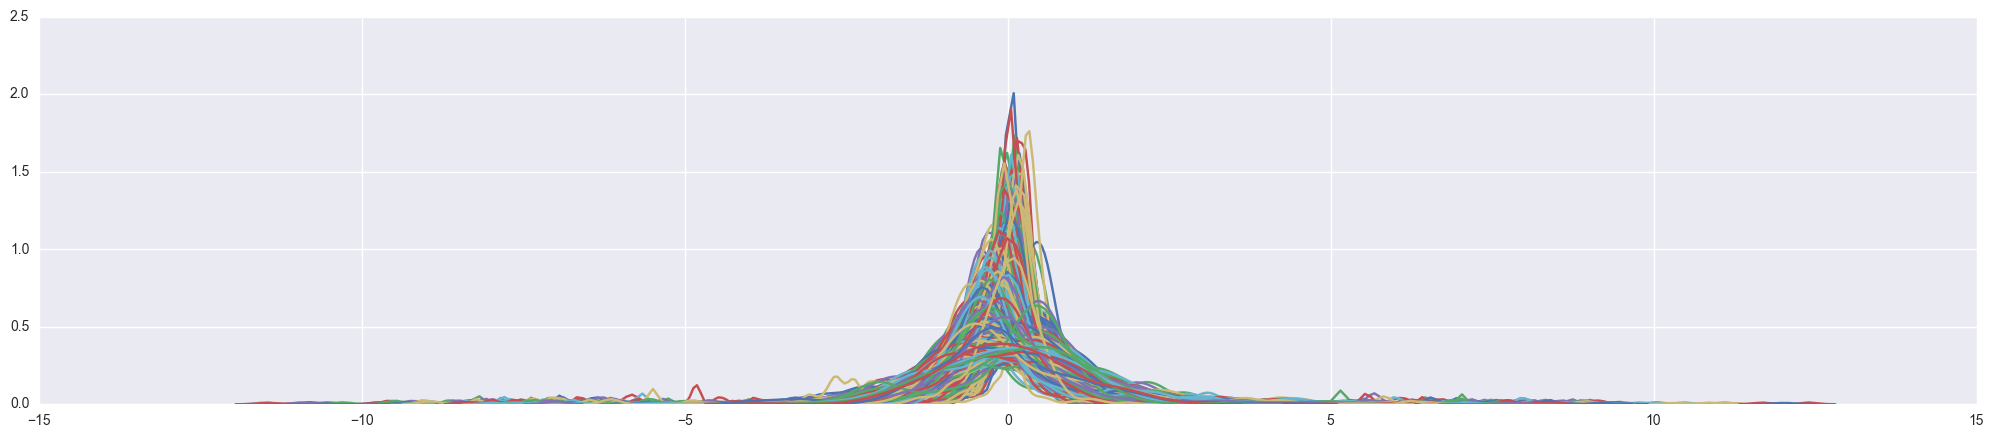

In [12]:
#extract into array
ss = StandardScaler()
xs = ss.fit_transform(x)

# 3 visuals for columns
def showdistcomb(x):
    ut.figurefullwidth()
    for i in range(np.shape(x)[1]):
    #    ut.subplottitle(i+1,cols[i], w=len(cols))
        sns.distplot(x[:,i], bins=20, hist=False)
    
    #print(c,df.shape,"Ouliers", len(outpoints), "{:1.2f}".format(out_per),"%","Nans",nans, "{:1.2f}".format(nan_per),"%","\n")
    plt.show()
showdistcomb(xs)
# summary stats
# anomolous dists? how to determine?

## 2) Present a Principal Components Analysis (PCA) plot for the samples. It should contain a scatterplot of the sample points with the axes PC1 vs. PC2. Indicate on the plot which samples have class = 1 and which have class = 0. 

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]

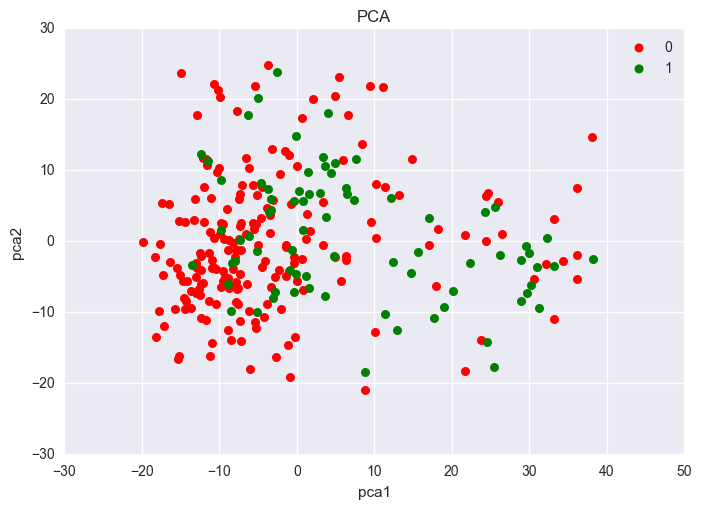

In [14]:
list(y[:10])
pc1 = PCA(n_components=2)
x_pca = pc1.fit_transform(xs)

for col, i, label in zip(["r","g"], [0, 1], ["class 0","class 1"]):
        plt.scatter(x_pca[y==i, 0], x_pca[y==i,1],
                    color=col, lw=2, label=label)
        
#s1 = plt.scatter(x_pca[:,0], x_pca[:,1], c=cl, label=list(cl))
plt.legend(loc='best')
plt.xlabel("pca1")
plt.ylabel("pca2")
plt.title('PCA')

## 3a) Calculate a statistic for every variable that describes its relationship with the class column. Don't list them all, but for the variable column with the most significant statistic, provide a visualization that shows its relationship with class. Include a brief paragraph describing your choices of statistic and visualization.

SelectPercentile(percentile=10,
         score_func=<function f_classif at 0x10d813d08>)

1494


{'boxes': [<matplotlib.lines.Line2D at 0x11f05a550>,
 'caps': [<matplotlib.lines.Line2D at 0x11f062f60>,
 'fliers': [<matplotlib.lines.Line2D at 0x11f06e9b0>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x11f06aa90>,
 'whiskers': [<matplotlib.lines.Line2D at 0x11f05af60>,
  <matplotlib.lines.Line2D at 0x11f073c18>]}

([<matplotlib.axis.XTick at 0x11e777fd0>,
 <a list of 2 Text xticklabel objects>)

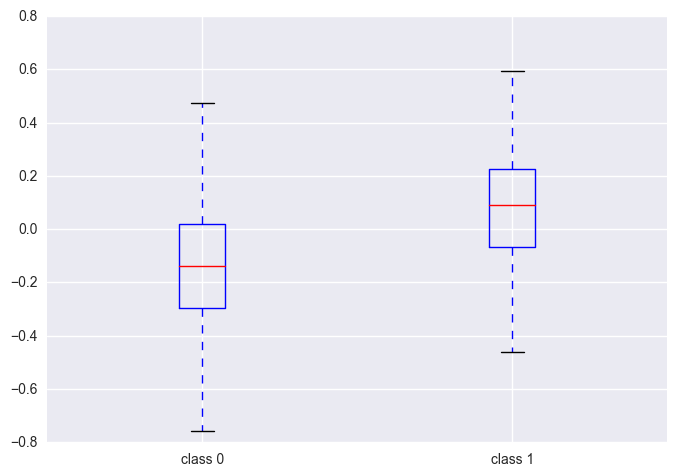

<Container object of 1551 artists>

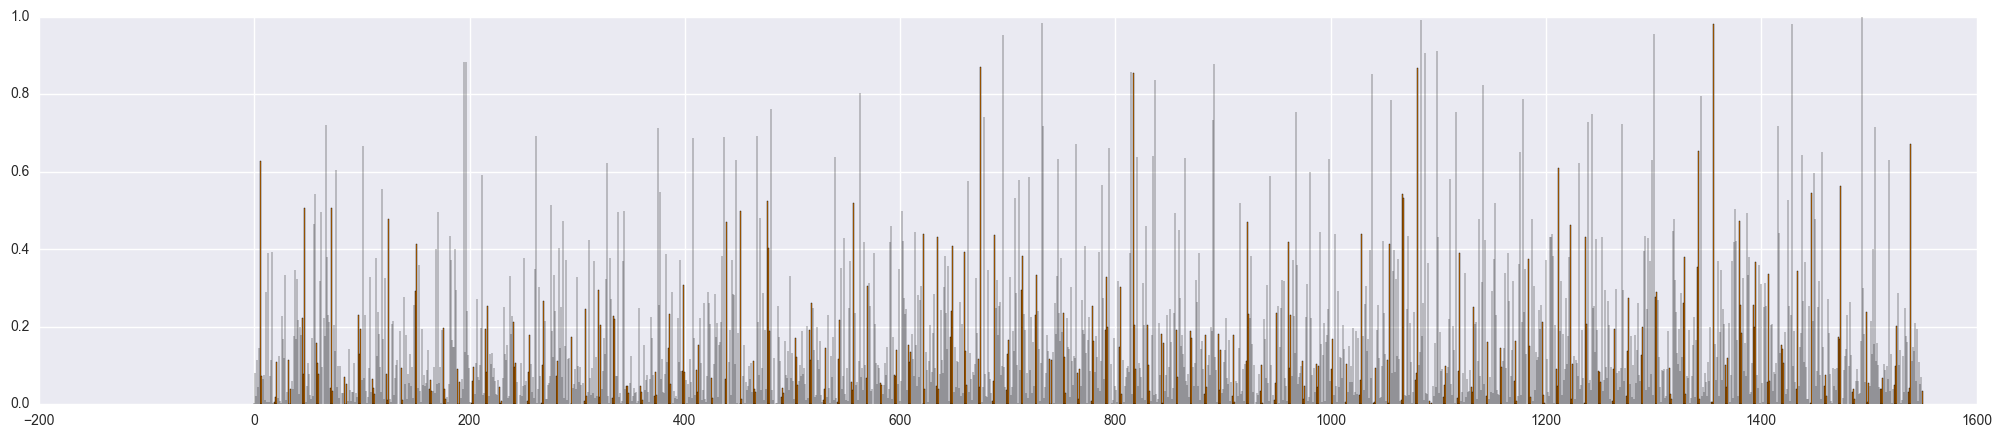

In [15]:
selector = SelectPercentile(f_classif, percentile=10)
selector.fit(x, y)
pvals = selector.pvalues_
idx = np.argmax(selector.scores_)

d = [x[y==0,1494], x[y==1,1494]]


print(idx)
plt.boxplot(d)
plt.xticks([1, 2], ['class 0', 'class 1'])
#plt.scatter(x[:,1494], y)
plt.show()
ut.figurefullwidth()
scores = -np.log10(pvals)
scores /= scores.max()
X_indices = np.arange(x.shape[-1])
plt.bar(X_indices - .45, scores, width=.2,
        label=r'Univariate score ($-Log(p_{value})$)', color='darkorange')

## 3b) Calculate a statistic for every variable that describes its relationship with PC1 (i.e. the first principal component). For the variable with the most significant statistic, provide a visualization that shows its relationship with PC1. Include a brief paragraph describing your choices of statistic and visualization.

SelectPercentile(percentile=10,
         score_func=<function f_regression at 0x10d813ea0>)

1239 653.025934869 4.90423466935e-74


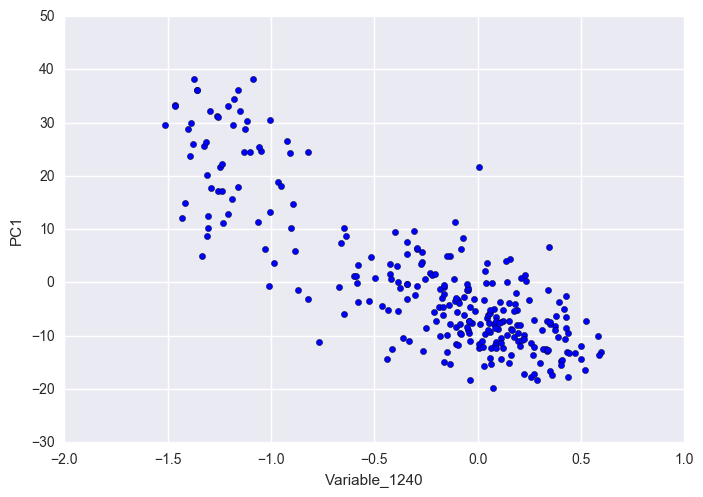

<Container object of 1551 artists>

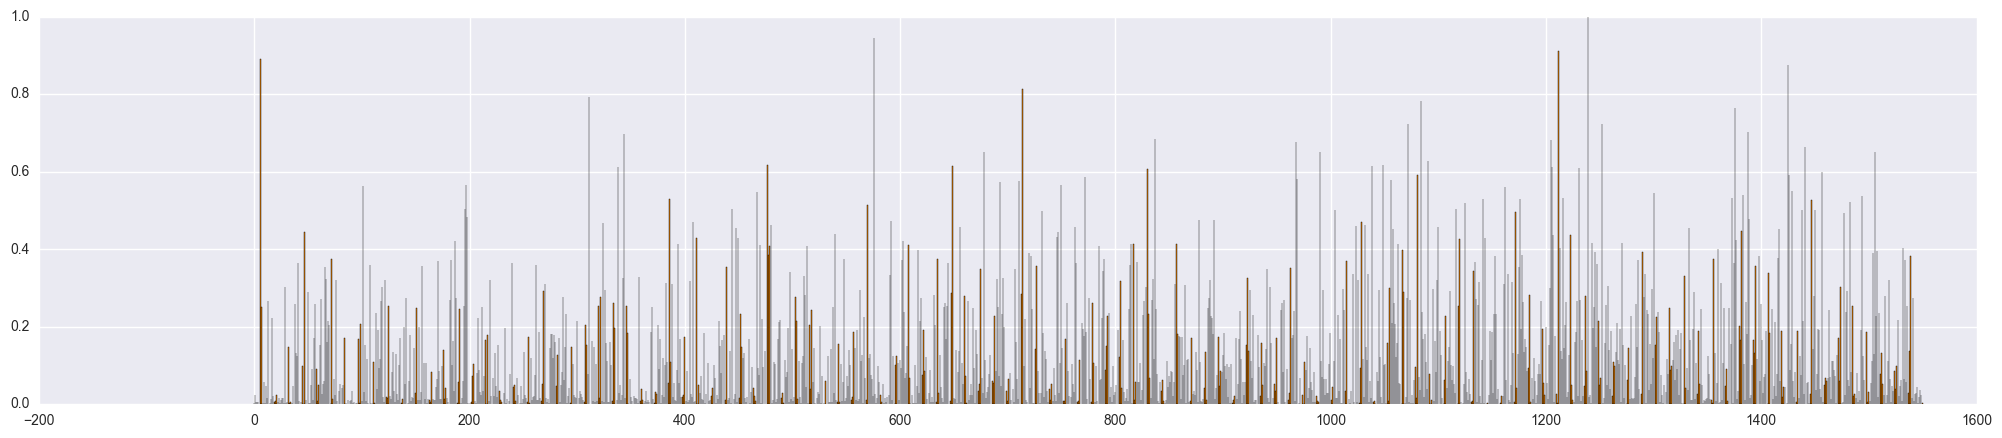

In [52]:
s2 = SelectPercentile(f_regression, percentile=10)
s2.fit(x, x_pca[:,0])
pvals = s2.pvalues_
idx = np.argmax(s2.scores_)

print(idx, s2.scores_[1239], s2.pvalues_[1239])
plt.scatter(x[:,1239], x_pca[:,0])
plt.xlabel("Variable_"+str(idx+1))
plt.ylabel("PC1")
#plt.scatter(x[:,1494], y)
plt.show()
ut.figurefullwidth()
scores = -np.log10(pvals)
scores /= scores.max()
X_indices = np.arange(x.shape[-1])
plt.bar(X_indices - .45, scores, width=.2,
        label=r'Univariate score ($-Log(p_{value})$)', color='darkorange')

## 4) Create a classifier model predicting class of each sample using some or all of the variables in the dataset. Use cross-validation to calculate the effectiveness of your classifier. Provide a short paragraph detailing your rationale for picking a classifier method, selecting a subset of variables for the model (if you did this), followed by a summary of your classifier's performance.

In [50]:
from sklearn.pipeline import make_pipeline
from sklearn import svm
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support, classification_report
from sklearn.dummy import DummyClassifier
ss2 = RobustScaler()
se2 = SelectPercentile(f_classif, percentile=100)
pc2 = PCA(n_components=2)
#also look at most_frequent
dummy = DummyClassifier(strategy="stratified")
dummy.fit( x,y )
clf = svm.SVC(kernel='linear')
pipe1 = Pipeline([('ss2', ss2), ('pc2',pc2),('se2', se2), ('clf',clf)])
pipe2 = Pipeline([('ss2', ss2), ('pc2',pc2),('se2', se2), ('clf',dummy)])
pipe1_grid = {"clf__kernel": ['linear', 'rbf'],
              "clf__C": [.01, .1, 1],
              "pc2__n_components":[2,5,10, 20, 100],
              #"se2__percentile": [1, 5, 10, 20, 40],
              }
pipe2_grid = {
                "clf__strategy":["stratified","most_frequent"],
                "pc2__n_components":[2,5,10],
              #  "se2__percentile": [1, 5, 10, 20, 40],
              }

#y_pred = cross_val_predict(pipe, x, y, cv=5)
grid1 = GridSearchCV(pipe1, param_grid=pipe1_grid)
grid2 = GridSearchCV(pipe2, param_grid=pipe2_grid)

grid1.fit(x, y)
grid2.fit(x,y)
ms1 = np.array(grid1.cv_results_['mean_test_score'])
ms2 = np.array(grid2.cv_results_['mean_test_score'])
grid1.best_params_
grid1.best_estimator_
ms1.mean()
ms2.mean()
#cm = confusion_matrix(y, y_pred, labels=[0,1])

#ut.plot_catmatrix(cm, [0, 1], [0, 1], x_title ="predicted", y_title="true")
#precision_recall_fscore_support(y, y_pred, average='macro')
#print(classification_report(y, y_pred))


#compare to baseline



DummyClassifier(constant=None, random_state=None, strategy='stratified')

GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(steps=[('ss2', RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
       with_scaling=True)), ('pc2', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('se2', SelectPercentile(percentile=100,
         score_...,
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'clf__kernel': ['linear', 'rbf'], 'clf__C': [0.01, 0.1, 1], 'pc2__n_components': [2, 5, 10, 20, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(steps=[('ss2', RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
       with_scaling=True)), ('pc2', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('se2', SelectPercentile(percentile=100,
         score_func=<function f_classif at 0x10d813d08>)), ('clf', DummyClassifier(constant=None, random_state=None, strategy='stratified'))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'clf__strategy': ['stratified', 'most_frequent'], 'pc2__n_components': [2, 5, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

{'clf__C': 1, 'clf__kernel': 'linear', 'pc2__n_components': 10}

Pipeline(steps=[('ss2', RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
       with_scaling=True)), ('pc2', PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('se2', SelectPercentile(percentile=100,
         score...,
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

0.71703431372549042

0.65563725490196079

In [ ]:
numcolsexOH = numcols
for key in onehotencodings.keys():
    numcolsexOH = list(set(numcolsexOH) - set(onehotencodings[key]))
print(numcolsexOH)
plotcorrel(df, numcolsexOH, numcolsexOH)
plt.figure()
#plt.plot(df["NumStationsWithPumpsAttending"], df["NumPumpsAttending"], 'o')
#plt.show()

In [ ]:


for i in catcols:
    ohlist = onehotencodings[i]
    print(i)
    #print(ohlist)
    #print(df_temp.shape)
    ut.figurefullwidth()
    plotcorrel(df_temp, ohlist, ["FirstPumpArriving_AttendanceTime"])
    plt.show()



#print(df2.head())

## Plot categories vs 1 numberical

In [ ]:


#print(df.head())
#print(inverseonehotencode(df, catcols[0],onehotencodings[catcols[0]]).head())
#shall I do a clustering on the pump arrival times? 
#arrival times vs station?
c2 = "FirstPumpArriving_AttendanceTime"

from statsmodels.stats.multicomp import pairwise_tukeyhsd, MultiComparison

#t test means of data across category
for c in catcols:
    try:
        print(c2, c)
        p_vals = []
        labels = []
        sub_values = []
        for c_sub1 in onehotencodings[c]:
            sub_values.append(list(df[df[c_sub1] == 1][c2].values))
        #print(sub_values)
        #print(sub_values)
        #ANOVA test 1 way
        stat, pval = sp.stats.f_oneway(*sub_values)
        print("ANOVA", stat, pval)
        #df_sub = inverseonehotencode(df, c, onehotencodings[c])
        #print(df_sub[c].head())
        #print(df_sub[c2].head())
        mod = MultiComparison(df[c2], df[c])
        tukey = mod.tukeyhsd()
        print(mod.groupsunique)
        #print()
        #print(tukey.meandiffs)
        print (tukey)
        combs = list(itertools.combinations(mod.groupsunique, 2))
        #print(len(combs))
        ave_means = [];
        for d in mod.groupsunique:
            #print(d)
            sum_means = 0;
            count_means = 0;
            for i in range(len(combs)):
                #print(d, i)
                a, b = combs[i]
                if(a == d or b == d):
                    sum_means += tukey.meandiffs[i]
                    count_means += 1
            ave_means.append(sum_means/count_means)
        #print(ave_means, np.arange(len(mod.groupsunique)))
        _ = plt.bar(np.arange(len(mod.groupsunique)), ave_means, align='center')
        _ = plt.xticks(np.arange(len(mod.groupsunique)), mod.groupsunique)
        _ = plt.xticks(rotation=90)
        _ = plt.show()
        boxplotcats(df, c2, catcols=[c])
       
    except Exception as e: 
        print (str(e))
    #for c_sub1 in onehotencodings[c]:
    #    sub1 = df[df[c_sub1] == 1][c2].values
    #    sub1_not = df[df[c_sub1] == 0][c2].values
    #    #Welch's t-test
    #    _, p_val = sp.stats.ttest_ind(sub1, sub1_not, equal_var = False)
    #    sig = p_val < 0.05
    #    p_vals.append(p_val)
    #    labels.append(c_sub1)
    #    print(c_sub1, "{:1.4f}".format(p_val), "Sig=", sig, "sub1mean=", sub1.mean(), "sub2mean=", sub1_not.mean())
    #plot_catmatrix(np.matrix([p_vals]), labels, [c2], normalize=False, y_title=c2, x_title=c)




## Plot 2 numerical - not used

In [ ]:
def plot2numerical(df_temp, c1, c2):
    x = df_temp[c1]
    y = df_temp[c2]
    # fit with np.polyfit
    m, b = np.polyfit(x, y, 1)

    plt.figure()
    plt.plot(x, y, '.')
    plt.plot(x, m*x + b, '-')
    plt.xlabel(c1)
    plt.ylabel(c2)
    plt.show()

for c in numcolsexOH:
    plot2numerical(df_temp, c2, c)

## Plot categories vs 2 numerical - not used

In [ ]:
#hour vs pump arrival time
# for each category in BoroughName
c2 = "FirstPumpArriving_AttendanceTime"
c1 = "weekday"
c3 = "IncGeo_BoroughName"
print(onehotencodings)
for c in onehotencodings[c3]:
    #print(c)
    df_temp2 = df_temp[df_temp[c].apply(lambda x: x == 1)]
    plot2numerical(df_temp2, c1, c2)

## Now do a random forest to see what affects dependent var 

In [ ]:
def mse(pred, act):
    diff = np.mean(np.power(pred-act, 2))
    return diff

def oneRF(df, c_xs, c_y):
    #print(c_xs, c_y)
    x1 = df[c_xs].values
    y1 = df[c_y].values.reshape(-1, 1)
    #print(x1)
    #print(y1)
    #normalise the data
    scaler = StandardScaler()
    x1 = scaler.fit_transform(x1)
    #x2 = scaler.transform(x2)
    sv = RandomForestRegressor()
    
    estimators = []
    estimators.append(("RF", sv))
    model = Pipeline(estimators)
    param_rf = {"RF__max_depth": [3],
              #"RF__max_features": [1, 3],
              "RF__min_samples_split": [ 3],
              "RF__min_samples_leaf": [3],
              "RF__bootstrap": [True, False],
               }
    
    cv_splits = 2
   
   
    svm = GridSearchCV(model, cv=cv_splits, param_grid=param_rf)
    svm.fit(x1, y1)
    y1_pred = svm.predict(x1)
    s_in = mse(y1_pred, np.squeeze(y1))
    #s_out = svm.score(x2, y2)
    return s_in

In [ ]:
c2 = "FirstPumpArriving_AttendanceTime"
#finding the best predictor of c2

iteration = 0
colsleft = numcols
colsincluded = []
total_mse = []
iteration_list = [];
#picker doesn't quite seem to be doing as good a job as all columns
while(iteration < 160):
    res_list = []
    if(len(colsleft) == 0):
        break
    print("iteration", iteration)
    print("colsleft", len(colsleft))
    acc = 0;
    for c in colsleft:
        if(not c == c2):
            temp_cols = colsincluded + [c]
            #print(temp_cols)
            s_in = oneRF(df, temp_cols, c2)
            res_list.append({"col": c, "s_in": s_in})
            acc +=1
            print("("+str(acc)+")", s_in, end="")

    res = pd.DataFrame(res_list)
    res = res.sort_values(["s_in"])
    #res = res.reindex(range(0, len(res)))
    print(res.head())
    #---------------------------------------
    # select best k columns
    #---------------------------------------
    for i in range(20):
        if(len(res) > 0):
            bestcol = res["col"].iloc[0]
            print("BEST COLUMN ", bestcol)
            res = res.drop(res.index[0])
            colsincluded.append(bestcol)
    
    s_cur = oneRF(df, colsincluded, c2)
    iteration_list.append(iteration)
    total_mse.append(s_cur)
    
    colsleft = res["col"].values
    iteration+=1

In [ ]:
print("Fit benchmark of all columns")
#calc with all columns in it
numcolsexc2 = list(set(numcols)- set([c2]))
s_in_max = oneRF(df, numcolsexc2, c2)
horiz_line_data = [iteration_list[0], iteration_list[-1]]
plt.plot( horiz_line_data,[s_in_max, s_in_max], 'r') 

plt.plot(iteration_list, total_mse)
print(len(numcols), s_in_max)
print(len(colsincluded), total_mse[-1])
plt.show()

#might not use this function
def dorandtes():    
    randtests = 10
    randdf = pd.DataFrame(np.random.randint(0,100,size=(df.shape[0], randtests)))
    randdf[c2] = df[c2]
    print(randdf.head())
    randlist = []
    for c in randdf.columns:
        s_in = oneRF(randdf, [c], c2)
        randlist.append(s_in)

    mean = np.mean(randlist)
    std = np.std(randlist)
    up_limit = mean + 2* std
    low_limit = mean - 2* std
    res_list.append({"col": "up_rand", "s_in": up_limit})
    res_list.append({"col": "mean_rand", "s_in": mean})
    res_list.append({"col": "low_rand", "s_in": low_limit})
    

# Presentation
-------
1. General thoughts on the dataset
2. Specific question
* Is BLM charging the right amount vs man hours?
3. What data do we have to answer that question?
4. What data we use? high correlation
5. LR of man hours vs charge
6 Look at LR with groupings of different case types


In [ ]:
print(len(numcols), s_in_max)
print(len(colsincluded), total_mse[-1])
s_in_max = oneRF(df, numcols, c2)
horiz_line_data = [iteration_list[0], iteration_list[-1]]
plt.plot( horiz_line_data,[s_in_max, s_in_max], 'r') 

plt.plot(iteration_list, total_mse)
plt.show()